# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [1]:
import json
import time
import warnings
from datetime import datetime
import pickle
import gensim.downloader as api
from gensim import corpora
from gensim.models import CoherenceModel, KeyedVectors, Word2Vec
from gensim.models.fasttext import FastTextKeyedVectors
from gensim.models.ldamodel import LdaModel
from gensim.test.utils import datapath
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from classes_and_definitions import *
warnings.filterwarnings("ignore")


# –ó–∞–≥—Ä—É–∑–∫–∞ —É–∂–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [2]:
data = pd.read_csv('./–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ–∞–π–ª—ã/dataset_for_modeling.csv')

categories = list(data['category'].unique())
category_mapping = {category: i + 1 for i, category in enumerate(categories)}

data['category_map'] = data['category'].map(category_mapping)

data['lemmas'] = data['lemmas'].str.replace(r'[\[\],\']', '').str.split()
data['lemmas_with_tags'] = data['lemmas_with_tags'].str.replace(r'[\[\],\']', '').str.split()
data.head(3)

text             city  \
0  21.01.2024 —Å–¥–µ–ª–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–µ—Ä–µ–Ω–æ—Å –¥–∞—Ç—ã –ø–ª–∞—Ç...           –ú–æ—Å–∫–≤–∞   
1  –°—Ç–∞–ª–∫–Ω—É–ª—Å—è —Å —Ç–∞–∫–æ–π –ø—Ä–æ–±–ª–µ–º–æ–π —á—Ç–æ –ø—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–µ ...     –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥   
2  15-16/01 –ø—ã—Ç–∞–ª—Å—è –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∏ —Å –¥–µ–±–µ—Ç–æ–≤–æ–π ...  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   

         date  rating  grade      bank category      site  \
0  2024-01-23       1      0  –ú–¢–° –ë–∞–Ω–∫  credits  banki_ru   
1  2024-01-23       1      0  –ú–¢–° –ë–∞–Ω–∫  credits  banki_ru   
2  2024-01-18       2      0  –ú–¢–° –ë–∞–Ω–∫  credits  banki_ru   

                    week    month  \
0  2024-01-22/2024-01-28  2024-01   
1  2024-01-22/2024-01-28  2024-01   
2  2024-01-15/2024-01-21  2024-01   

                                      text_processed  \
0  ['—Å–¥–µ–ª–∞–ª–∞', '–∑–∞—è–≤–∫—É', '–ø–µ—Ä–µ–Ω–æ—Å', '–¥–∞—Ç—ã', '–ø–ª–∞—Ç...   
1  ['—Å—Ç–∞–ª–∫–Ω—É–ª—Å—è', '–ø—Ä–æ–±–ª–µ–º–æ–π', '–ø–µ—Ä–µ–≤–æ–¥–µ', '–¥–µ–Ω–µ–≥...   
2  ['—á–∏—Å–ª–æ', '–ø—ã—Ç–∞–ª—Å—è', '–ø–µ—Ä–µ–≤–µ—Å—Ç–∏', '–¥–µ–Ω—å–≥–∏', '–¥...   

                                              lemmas  \
0  [—Å–¥–µ–ª–∞—Ç—å, –∑–∞—è–≤–∫–∞, –ø–µ—Ä–µ–Ω–æ—Å, –¥–∞—Ç–∞, –ø–ª–∞—Ç–µ–∂, –ø—Ä–∏–ª–æ...   
1  [–ø—Ä–æ–±–ª–µ–º–∞, –ø–µ—Ä–µ–≤–æ–¥, –¥–µ–Ω—å–≥–∏, –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞—Ç—å, –æ–ø–µ...   
2  [–ø—ã—Ç–∞—Ç—å—Å—è, –ø–µ—Ä–µ–≤–µ—Å—Ç–∏, –¥–µ–Ω—å–≥–∏, –¥–µ–±–µ—Ç–æ–≤—ã–π, –∫–∞—Ä—Ç–∞...   

                                    lemmas_with_tags  category_map  
0  [—Å–¥–µ–ª–∞—Ç—å_VERB, –∑–∞—è–≤–∫–∞_NOUN, –ø–µ—Ä–µ–Ω–æ—Å_NOUN, –¥–∞—Ç–∞...             1  
1  [—Å—Ç–∞–ª–∫–Ω—É—Ç—å—Å—è_VERB, –ø—Ä–æ–±–ª–µ–º–∞_NOUN, –ø–µ—Ä–µ–≤–æ–¥_NOUN...             1  
2  [—á–∏—Å–ª–æ_NOUN, –ø—ã—Ç–∞—Ç—å—Å—è_VERB, –ø–µ—Ä–µ–≤–µ—Å—Ç–∏_VERB, –¥–µ...             1

In [3]:
train_data, valid_data = train_test_split(data, test_size=0.3, stratify=data['category'])

print("Train data shape:", train_data.shape)
print("Validation data shape:", valid_data.shape)


Train data shape: (11172, 14)
Validation data shape: (4788, 14)


# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏

In [6]:
sentiment_classifier = SentimentClassifier(train_data['lemmas'], train_data['grade'])

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å - __TF-IDF + SVM__

## Bag of words

### –õ–æ–≥—Ä–µ–≥

ROC AUC Score: 0.979
Precision: 0.963
Recall: 0.964
Accuracy: 0.946


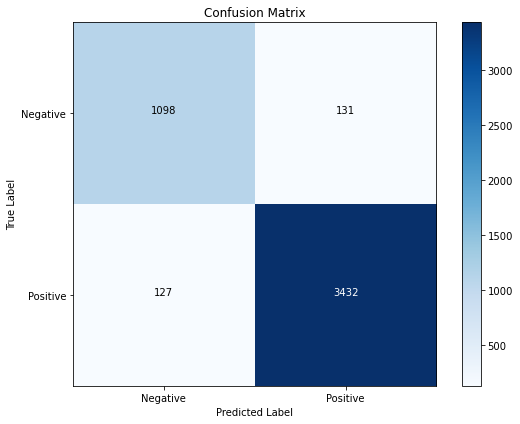

In [5]:
task_type = 'bag_of_words'
classifier_name = 'logreg'

sentiment_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name)
sentiment_classifier.evaluate_model(valid_data['lemmas'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


### SVM

ROC AUC Score: 0.983
Precision: 0.967
Recall: 0.957
Accuracy: 0.944


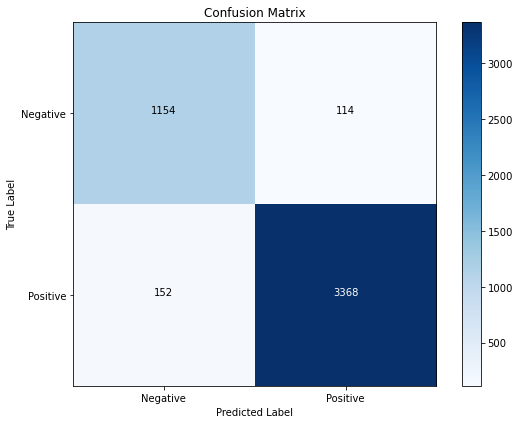

In [21]:
task_type = 'bag_of_words'
classifier_name = 'svm'

sentiment_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name)
sentiment_classifier.evaluate_model(valid_data['lemmas'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


## tf-idf

### –õ–æ–≥—Ä–µ–≥

ROC AUC Score: 0.985
Precision: 0.961
Recall: 0.968
Accuracy: 0.948


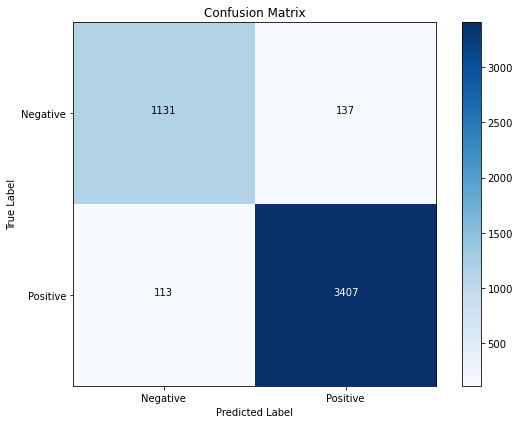

In [22]:
task_type = 'tfidf'
classifier_name = 'logreg'

sentiment_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name)
sentiment_classifier.evaluate_model(valid_data['lemmas'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


### SVM

ROC AUC Score: 0.985
Precision: 0.978
Recall: 0.961
Accuracy: 0.954


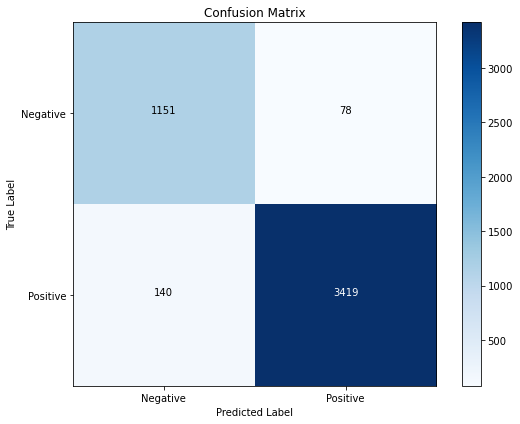

In [7]:
task_type = 'tfidf'
classifier_name = 'svm'

sentiment_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name)
sentiment_classifier.evaluate_model(valid_data['lemmas'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


### –ë—É—Å—Ç–∏–Ω–≥

ROC AUC Score: 0.985
Precision: 0.958
Recall: 0.966
Accuracy: 0.944


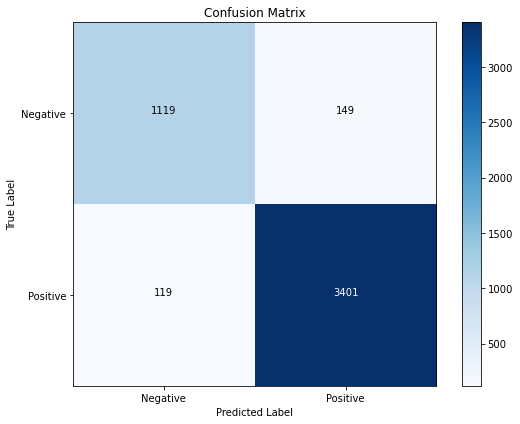

In [23]:
task_type = 'tfidf'
classifier_name = 'catboost'

sentiment_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name)
sentiment_classifier.evaluate_model(valid_data['lemmas'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


## FastText (simple mean strategy)

### –õ–æ–≥—Ä–µ–≥

In [25]:
ft_path = '/Users/r.kushkhabiev/–£—á–µ–±–∞/–ò–ü–°/model.model'
ft_model = FastTextKeyedVectors.load(ft_path)

ROC AUC Score: 0.977
Precision: 0.963
Recall: 0.951
Accuracy: 0.938


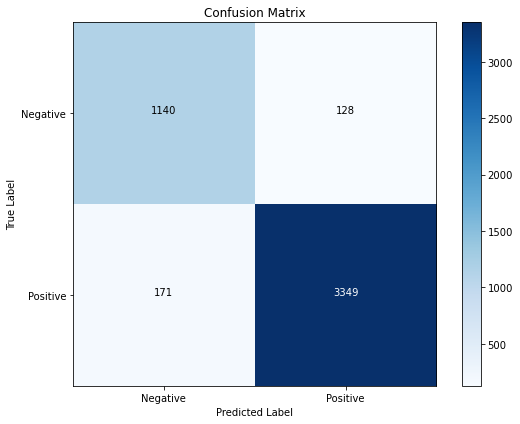

In [36]:
task_type = 'mean_embedding_vectorizer'
classifier_name = 'logreg'
embedding_vectorizer = ft_model

sentiment_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name, embedding_vectorizer = embedding_vectorizer)
sentiment_classifier.evaluate_model(valid_data['lemmas'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


### Boosting

ROC AUC Score: 0.981
Precision: 0.964
Recall: 0.957
Accuracy: 0.942


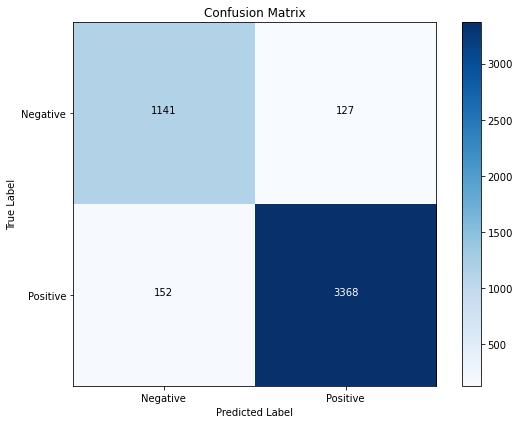

In [37]:
task_type = 'mean_embedding_vectorizer'
classifier_name = 'catboost'
embedding_vectorizer = ft_model

sentiment_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name, embedding_vectorizer = embedding_vectorizer)
sentiment_classifier.evaluate_model(valid_data['lemmas'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


## FastText (tf-idf weighted strategy)

ROC AUC Score: 0.975
Precision: 0.958
Recall: 0.948
Accuracy: 0.931


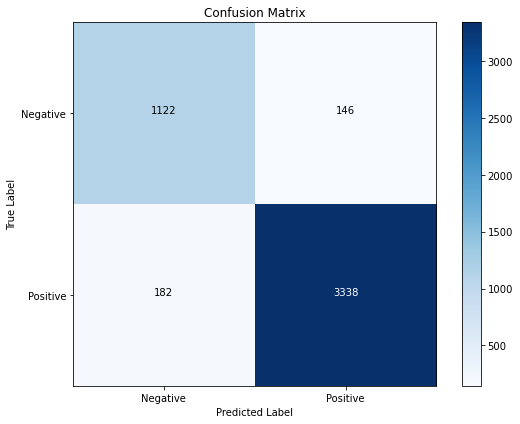

In [42]:
task_type = 'tfidf_embedding_vectorizer'
classifier_name = 'logreg'
embedding_vectorizer = ft_model

sentiment_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name, embedding_vectorizer = embedding_vectorizer)
sentiment_classifier.evaluate_model(valid_data['lemmas'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


## Word2vec

In [44]:
word2vec_path = '/Users/r.kushkhabiev/–£—á–µ–±–∞/–ò–ü–°/word2vec.bin'
word2vec_model = KeyedVectors.load_word2vec_format(datapath(word2vec_path), binary=True)
sentiment_classifier_TAGS = SentimentClassifier(train_data['lemmas_with_tags'], train_data['grade'])

ROC AUC Score: 0.975
Precision: 0.949
Recall: 0.956
Accuracy: 0.930


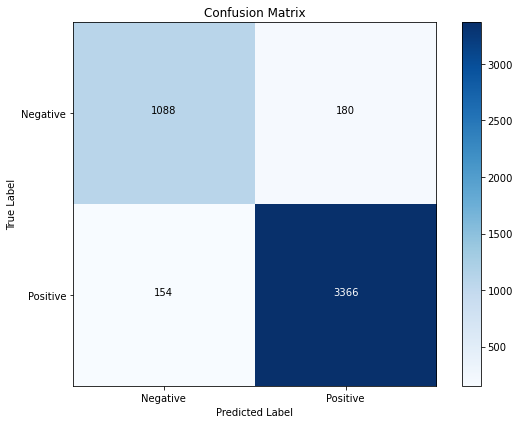

In [48]:
task_type = 'mean_embedding_vectorizer'
classifier_name = 'catboost'
embedding_vectorizer = word2vec_model

sentiment_classifier_TAGS.fit_classifier(task_type=task_type, classifier_name=classifier_name, embedding_vectorizer = embedding_vectorizer)
sentiment_classifier_TAGS.evaluate_model(valid_data['lemmas_with_tags'], valid_data['grade'], task_type=task_type, classifier_name=classifier_name)


## –í—ã–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å

In [8]:
with open('./–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ–∞–π–ª—ã/sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(sentiment_classifier, f)

# –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

## –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ num_topics 
### –¢—É—Ç –ø—Ä–æ–±—É–µ–º –∏—Å–∫–∞—Ç—å —Ç–µ–º—ã –Ω–∞ –≤—Å—ë–º –¥–∞—Ç–∞—Å–µ—Ç–µ –±–µ–∑ –∫–∞–∫–∏—Ö-–ª–∏–±–æ –¥–µ–ª–µ–Ω–∏–π –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∏–ª–∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç
### –í–ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏–∏ –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ —á—Ç–æ –ø–æ–¥—Ö–æ–¥ —Ç–∞–∫–æ–π —Å–µ–±–µ, –ø–æ—ç—Ç–æ–º—É —Ä–∞–∑–¥–µ–ª –Ω–µ–æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã–π


In [96]:
X_train = train_data['lemmas'].values
dictionary = corpora.Dictionary(X_train)
corpus = [dictionary.doc2bow(text) for text in X_train]

In [49]:
min_topics = 3
max_topics = 25

model_results = {'Topics': [],
                 'Perplexity': [],
                 'Coherence': []}

for num_topics in range(min_topics, max_topics + 1):
    lda_model = LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics,
                            random_state=100,
                            update_every=1,
                            chunksize=100,
                            passes=10,
                            alpha='symmetric',
                            per_word_topics=True)

    perplexity = lda_model.log_perplexity(corpus)

    coherence_model_lda = CoherenceModel(model=lda_model, texts = X_train, corpus = corpus, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    model_results['Topics'].append(num_topics)
    model_results['Perplexity'].append(perplexity)
    model_results['Coherence'].append(coherence_lda)

    print(f"Num Topics: {num_topics:.3f}, Perplexity: {perplexity:.3f}, Coherence: {coherence_lda:.3f}")

### –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å [–Ω–µ –Ω—É–∂–Ω–æ]

In [93]:
lda_model = LdaModel(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics,
                        random_state=100,
                        update_every=1,
                        chunksize=100,
                        passes=10,
                        alpha='symmetric',
                        per_word_topics=True)

In [94]:
top_words_per_topic = lda_model.print_topics(num_words=10)
for topic_number, topic in enumerate(top_words_per_topic):
    print(f"–¢–µ–º–∞ {topic_number + 1}:")
    print(topic)
    print("\n")

–¢–µ–º–∞ 1:
(0, '0.178*"–∏–ø–æ—Ç–µ–∫–∞" + 0.107*"–º–µ–Ω–µ–¥–∂–µ—Ä" + 0.097*"—Å–¥–µ–ª–∫–∞" + 0.083*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.040*"–∫–≤–∞—Ä—Ç–∏—Ä–∞" + 0.026*"–Ω–∞—à" + 0.026*"—Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è" + 0.026*"–æ–¥–æ–±—Ä–µ–Ω–∏–µ" + 0.023*"–¥–æ–º" + 0.022*"—Å—Ç—Ä–∞—Ö–æ–≤–æ–π"')


–¢–µ–º–∞ 2:
(1, '0.067*"—Ç–æ—á–∫–∞" + 0.063*"–∫–µ—à–±—ç–∫" + 0.060*"–µ–ª–µ–Ω–∞" + 0.058*"–∞–±—Å–æ–ª—é—Ç–Ω–æ" + 0.045*"–Ω–∞–ø–æ–º–∏–Ω–∞—Ç—å" + 0.035*"–ø–ª–æ—Ö–æ–π" + 0.032*"—Å–æ–≥–ª–∞—à–µ–Ω–∏–µ" + 0.026*"–∏–ø–∞—Ç—å" + 0.025*"–≤–∞–ª–µ—Ä–∏–π" + 0.018*"–∑–≤–µ–∑–¥–∞"')


–¢–µ–º–∞ 3:
(2, '0.099*"–≤–æ–ø—Ä–æ—Å" + 0.087*"—á–∞—Ç" + 0.075*"–æ—Ç–≤–µ—á–∞—Ç—å" + 0.053*"–ø–æ–¥–¥–µ—Ä–∂–∫–∞" + 0.051*"–æ–ø–µ—Ä–∞—Ç–æ—Ä" + 0.045*"–æ—Ç–≤–µ—Ç" + 0.031*"—Ä–µ—à–∞—Ç—å" + 0.023*"—É—Ç–æ—á–Ω—è—Ç—å" + 0.021*"–æ–Ω–ª–∞–π–Ω" + 0.021*"–Ω–∞–ø–∏—Å–∞—Ç—å"')


–¢–µ–º–∞ 4:
(3, '0.057*"–±–∞–Ω–∫" + 0.032*"–∫—Ä–µ–¥–∏—Ç" + 0.028*"–¥–µ–Ω—å" + 0.023*"–ø–ª–∞—Ç–µ–∂" + 0.021*"–æ–±—Ä–∞—â–µ–Ω–∏–µ" + 0.020*"–Ω–µ" + 0.019*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.018*"–¥–æ–≥–æ–≤–æ—Ä" 

- pyLDAvis.enable_notebook(local = True)
- visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
- pyLDAvis.display(visualization)

–∫–æ–¥ –¥–ª—è –∫–æ–ª–∞–±–∞

## –î–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–æ–ø—ã—Ç–∞–µ–º—Å—è –Ω–∞–π—Ç–∏ 5 —Ç–µ–º –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –∫–ª–∞—Å—Å–∞ 1, –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è 0

In [348]:
num_topics = 5
category_models = dict([])
categories = list(data['category'].unique())
grades = [0, 1]
common_dictionary = corpora.Dictionary(data['lemmas'])

for cat in categories:
    category_models[cat] = {0 : {'dictionary' : common_dictionary,
                                    'lda_model' : None},
                            1 : {'dictionary' : common_dictionary,
                                    'lda_model' : None}}

for category in categories: 
    for grade in grades:
        local_dataset = data.loc[(data['category'] == category) & (data['grade'] == grade), 'lemmas'].values
        local_corpus = [common_dictionary.doc2bow(text) for text in local_dataset]
        category_models[category][grade]['lda_model'] = LdaModel(corpus=local_corpus,
                                id2word=common_dictionary,
                                num_topics=num_topics,
                                random_state=100,
                                update_every=1,
                                chunksize=100,
                                passes=10,
                                alpha='symmetric',
                                per_word_topics=True)


### –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å

In [350]:
with open('./–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ–∞–π–ª—ã/category_models.pkl', 'wb') as f:
    pickle.dump(category_models, f)

### –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–µ–º—ã

In [301]:
def show_themes(category: str, grade: int) -> None:
    top_words_per_topic = category_models[category][grade]['lda_model'].print_topics(num_words=10)
    for topic_number, topic in enumerate(top_words_per_topic):
        print(f"–¢–µ–º–∞ {topic_number + 1}:")
        print(topic)
        print("\n")
        

In [351]:
show_themes(category = 'autocredits', grade = 0)

–¢–µ–º–∞ 1:
(0, '0.034*"—É—Å–ª—É–≥–∞" + 0.027*"–∫—Ä–µ–¥–∏—Ç" + 0.023*"–Ω–µ" + 0.023*"–¥–æ–≥–æ–≤–æ—Ä" + 0.017*"—Å—Ç–∞–≤–∫–∞" + 0.014*")" + 0.012*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∞" + 0.012*"–≤–æ–∑–≤—Ä–∞—Ç" + 0.012*"–æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ" + 0.011*"—Å—Ä–µ–¥—Å—Ç–≤–æ"')


–¢–µ–º–∞ 2:
(1, '0.055*"–Ω–µ" + 0.013*"–∑–∞—è–≤–∫–∞" + 0.013*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.011*"–∫—Ä–µ–¥–∏—Ç" + 0.009*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.009*"—Å–∫–∞–∑–∞—Ç—å" + 0.009*"–∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç" + 0.009*")" + 0.008*"–æ—Ç–≤–µ—Ç" + 0.008*"–æ–±—Ä–∞—â–µ–Ω–∏–µ"')


–¢–µ–º–∞ 3:
(2, '0.043*"–Ω–µ" + 0.023*"–ø–ª–∞—Ç–µ–∂" + 0.020*"–∫—Ä–µ–¥–∏—Ç" + 0.019*"—Å—É–º–º–∞" + 0.017*"–ø–æ–≥–∞—à–µ–Ω–∏–µ" + 0.016*"–¥–µ–Ω—å–≥–∏" + 0.014*"—Å—á–µ—Ç" + 0.012*")" + 0.011*"–¥–æ—Å—Ä–æ—á–Ω—ã–π" + 0.008*"–∫–∞—Ä—Ç–∞"')


–¢–µ–º–∞ 4:
(3, '0.041*"–∑–∞–ª–æ–≥" + 0.025*"–∞–≤—Ç–æ–º–æ–±–∏–ª—å" + 0.016*"—Å–Ω–∏–º–∞—Ç—å" + 0.016*"–≤—Ç–±" + 0.015*"—Å–Ω—è—Ç–∏–µ" + 0.014*"–∞–≤—Ç–æ" + 0.013*"—Å–ø—Ä–∞–≤–∫–∞" + 0.011*"–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è" + 0.010*"–≥–æ–¥" + 0.010*"–æ–±—Ä–µ–º–µ–Ω–µ–Ω–∏–µ"')



–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ–± –∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –ù–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω–∏—è (–≤—ã—Å–æ–∫–∏–µ —Å—Ç–∞–≤–∫–∏, —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ–º –¥–æ–≥–æ–≤–æ—Ä–∞, —É—Å–ª—É–≥–æ–π —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏—è –∏ –≤–æ–∑–≤—Ä–∞—Ç–æ–º —Å—Ä–µ–¥—Å—Ç–≤)

- –¢–µ–º–∞ 2: –ü—Ä–æ–±–ª–µ–º—ã —Å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –æ–±—Ä–∞—â–µ–Ω–∏—è –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–∫–∏ (–ø—Ä–æ–±–ª–µ–º—ã —Å –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ–º –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –æ–±—â–µ–Ω–∏–µ–º —Å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º–∏ –±–∞–Ω–∫–∞, –ø–æ–ª—É—á–µ–Ω–∏–µ–º –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –∑–∞–ø—Ä–æ—Å—ã –∏–ª–∏ –≤ —Ü–µ–ª–æ–º —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –∑–∞—è–≤–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç)

- –¢–µ–º–∞ 3: –ü—Ä–æ–±–ª–µ–º—ã —Å –ø–ª–∞—Ç–µ–∂–∞–º–∏ –∏ –ø–æ–≥–∞—à–µ–Ω–∏–µ–º –∫—Ä–µ–¥–∏—Ç–∞ (—Ç—Ä—É–¥–Ω–æ—Å—Ç–∏ —Å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å—É–º–º—ã –ø–ª–∞—Ç–µ–∂–∞, –∑–∞–¥–µ—Ä–∂–∫–∞–º–∏ –∏–ª–∏ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–º–∏ —Å–ø–∏—Å–∞–Ω–∏—è–º–∏ —Å—Ä–µ–¥—Å—Ç–≤, —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –¥–æ—Å—Ä–æ—á–Ω—ã–º –ø–æ–≥–∞—à–µ–Ω–∏–µ–º)

- –¢–µ–º–∞ 4: –ü—Ä–æ–±–ª–µ–º—ã —Å –∑–∞–ª–æ–≥–æ–º –∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–º (—Ç—Ä—É–¥–Ω–æ—Å—Ç–∏ —Å –æ—Ü–µ–Ω–∫–æ–π –∏–ª–∏ —Å–Ω—è—Ç–∏–µ–º –∑–∞–ª–æ–≥–∞, –ø—Ä–æ–±–ª–µ–º—ã —Å –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–º, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –¥–æ–∫—É–º–µ–Ω—Ç–∞–º–∏,—Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –ø–æ–ª—É—á–µ–Ω–∏–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–ª–∏ —Å–ø—Ä–∞–≤–æ–∫ –æ—Ç –±–∞–Ω–∫–∞)

- –¢–µ–º–∞ 5: –ù–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —É—Å–ª–æ–≤–∏—è–º–∏ –∏ —Å—É–º–º–æ–π –ø–ª–∞—Ç–µ–∂–µ–π (–ø—Ä–æ–±–ª–µ–º—ã —Å —É—Å–ª–æ–≤–∏—è–º–∏ –∫—Ä–µ–¥–∏—Ç–∞, –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è —Ä–∞—Å—Å—Ä–æ—á–∫–∏, –Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —Å—É–º–º–æ–π –µ–∂–µ–º–µ—Å—è—á–Ω—ã—Ö –ø–ª–∞—Ç–µ–∂–µ–π)

In [352]:
show_themes(category = 'autocredits', grade = 1)

–¢–µ–º–∞ 1:
(0, '0.040*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.027*"—Å–ø–∞—Å–∏–±–æ" + 0.018*"–±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å" + 0.017*"–≤—ã—Ä–∞–∂–∞—Ç—å" + 0.016*"–æ–±—Ä–∞—â–∞—Ç—å—Å—è" + 0.015*"–∫–ª–∏–µ–Ω—Ç" + 0.014*"–æ–≥—Ä–æ–º–Ω—ã–π" + 0.013*"—à—Ç—Ä–∞—Ñ" + 0.013*"—Ö–æ—Ç–µ—Ç—å" + 0.012*"—Ä–µ—à–µ–Ω–∏–µ"')


–¢–µ–º–∞ 2:
(1, '0.025*"–∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç" + 0.025*"–∫—Ä–µ–¥–∏—Ç" + 0.023*"–æ—á–µ–Ω—å" + 0.019*"—É—Å–ª–æ–≤–∏–µ" + 0.015*"–∞–≤—Ç–æ–º–æ–±–∏–ª—å" + 0.015*"–±—ã—Å—Ç—Ä–æ" + 0.013*"–Ω–µ" + 0.013*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.011*"–≤—Å–µ" + 0.009*"–æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ"')


–¢–µ–º–∞ 3:
(2, '0.047*"–Ω–µ" + 0.024*"–º–µ—Å—è—Ü" + 0.021*"—É—Å–ª–æ–≤–∏–µ" + 0.018*"—Å—É–º–º–∞" + 0.017*"–ø–ª–∞—Ç–µ–∂" + 0.012*"—Å—Ç–∞–≤–∫–∞" + 0.011*"–∫–∞—Ä—Ç–∞" + 0.010*"–≤—ã–ø–æ–ª–Ω—è—Ç—å" + 0.009*")" + 0.008*"–¥–æ–≥–æ–≤–æ—Ä"')


–¢–µ–º–∞ 4:
(3, '0.047*"–∫—Ä–µ–¥–∏—Ç" + 0.021*"–Ω–µ" + 0.020*"–∑–∞–∫—Ä—ã–≤–∞—Ç—å" + 0.016*"–∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç" + 0.013*"–ø–æ–≥–∞—à–µ–Ω–∏–µ" + 0.012*"–¥–µ–Ω—å–≥–∏" + 0.011*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ" + 0.010*"–¥–æ—Å—Ä–

–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ–± –∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –•–æ—Ä–æ—à–µ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ (–ø—Ä–∏–∑–Ω–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–∞ –ø–æ–º–æ—â—å –∏–ª–∏ —Ä–µ—à–µ–Ω–∏–µ –≤–æ–∑–Ω–∏–∫—à–∏—Ö –ø—Ä–æ–±–ª–µ–º, –æ–±—â–µ–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–∞ –ø—Ä–æ—Ü–µ—Å—Å–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∏ —Ä–∞–±–æ—Ç—ã —Å –±–∞–Ω–∫–æ–º)

- –¢–µ–º–∞ 2: –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç–∞ (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ —ç–º–æ—Ü–∏–∏ –æ—Ç –ø—Ä–æ—Å—Ç–æ—Ç—ã –∏ —É–¥–æ–±—Å—Ç–≤–∞ –ø—Ä–æ—Ü–µ—Å—Å–∞ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞, –æ—Ç –≤—ã–≥–æ–¥–Ω—ã—Ö —É—Å–ª–æ–≤–∏–π)

- –¢–µ–º–∞ 3: –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —É—Å–ª–æ–≤–∏—è–º–∏ –∫—Ä–µ–¥–∏—Ç–∞ –∏ –≤—ã–ø–ª–∞—Ç–∞–º–∏ –ø–æ –∫—Ä–µ–¥–∏—Ç—É (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –≤—ã–ø–ª–∞—Ç, —É—Å–ª–æ–≤–∏—è–º–∏ –∫—Ä–µ–¥–∏—Ç–∞, –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ–º —Å–≤–æ–∏—Ö –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤ –±–∞–Ω–∫–æ–º –∏–ª–∏ –≥–æ—Ç–æ–≤–Ω–æ—Å—Ç—å –∏ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–∞ –≤—ã–ø–æ–ª–Ω—è—Ç—å –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤–∞ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É)

- –¢–µ–º–∞ 4: –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –∑–∞–∫—Ä—ã—Ç–∏—è –∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç–∞ (—É—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –ø–æ–≥–∞—à–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞ —á–µ—Ä–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –±–∞–Ω–∫–∞ –∏–ª–∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –¥–æ—Å—Ä–æ—á–Ω–æ–≥–æ –ø–æ–≥–∞—à–µ–Ω–∏—è)

- –¢–µ–º–∞ 5: –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ä–∞—Å—Å—Ä–æ—á–∫–∏ (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –≤—ã–≥–æ–¥–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã, –≤–∫–ª—é—á–∞—è –Ω–∏–∑–∫–∏–µ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–µ —Å—Ç–∞–≤–∫–∏, –¥–æ—Å—Ç—É–ø–Ω—ã–µ —Ä–∞—Å—Å—Ä–æ—á–∫–∏, –≥–æ—Ç–æ–≤–Ω–æ—Å—Ç—å —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å –∫–∞—Ä—Ç—É –¥—Ä—É–≥–∏–º)

In [353]:
show_themes(category = 'credits', grade = 0)

–¢–µ–º–∞ 1:
(0, '0.041*"–∫—Ä–µ–¥–∏—Ç" + 0.025*"—É—Å–ª—É–≥–∞" + 0.024*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∞" + 0.022*"–Ω–µ" + 0.021*"—Å—É–º–º–∞" + 0.018*"–¥–æ–≥–æ–≤–æ—Ä" + 0.017*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.015*"—Å—Ç–∞–≤–∫–∞" + 0.012*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.011*"—Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ"')


–¢–µ–º–∞ 2:
(1, '0.051*"–Ω–µ" + 0.014*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.013*"–∑–∞—è–≤–∫–∞" + 0.012*")" + 0.011*"–∫—Ä–µ–¥–∏—Ç" + 0.009*"—Å–∫–∞–∑–∞—Ç—å" + 0.008*"–∫–ª–∏–µ–Ω—Ç" + 0.007*"–∑–≤–æ–Ω–æ–∫" + 0.007*"–æ—Ç–≤–µ—Ç" + 0.006*"–æ—Ç–≤–µ—á–∞—Ç—å"')


–¢–µ–º–∞ 3:
(2, '0.044*"–Ω–µ" + 0.023*"—Å—á–µ—Ç" + 0.021*"–ø–ª–∞—Ç–µ–∂" + 0.020*"–∫–∞—Ä—Ç–∞" + 0.020*"–∫—Ä–µ–¥–∏—Ç" + 0.018*"–¥–µ–Ω—å–≥–∏" + 0.011*"—Å—É–º–º–∞" + 0.010*")" + 0.009*"—Å–ø–∏—Å—ã–≤–∞—Ç—å" + 0.008*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ"')


–¢–µ–º–∞ 4:
(3, '0.023*"–ø–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ" + 0.017*"–∞—Ä–µ—Å—Ç" + 0.015*"–±–∫–∏" + 0.014*"–ø—Ä–∏—Å—Ç–∞–≤" + 0.013*"–∏—Å—Ç–æ—Ä–∏—è" + 0.012*"–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è" + 0.012*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.011*"–≥–æ–¥" + 0.010*"–±—é—Ä–æ" + 0.009*"–¥—Å"')




–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ –∫—Ä–µ–¥–∏—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –ü—Ä–æ–±–ª–µ–º—ã —Å —É—Å–ª–æ–≤–∏—è–º–∏ –∫—Ä–µ–¥–∏—Ç–∞ –∏ —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ–º (–≤—ã—Å–æ–∫–∏–µ —Å—Ç–∞–≤–∫–∏, –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–∞, –Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ –ø—Ä–æ—Ü–µ—Å—Å–æ–º —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏—è)

- –¢–µ–º–∞ 2: –ü—Ä–æ–±–ª–µ–º—ã —Å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º –∏ –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –∑–∞—è–≤–æ–∫ (–¥–æ–ª–≥–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –∑–∞—è–≤–∫—É, –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–ª–∏ –Ω–µ–ø–æ–ª–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞, –Ω–µ—É–¥–æ–≤—Å–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–∞)

- –¢–µ–º–∞ 3: –ü—Ä–æ–±–ª–µ–º—ã —Å –ø–ª–∞—Ç–µ–∂–∞–º–∏ –∏ —Å—á–µ—Ç–∞–º–∏ (–Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ —Å–ø–∏—Å–∞–Ω–∏—è —Å—Ä–µ–¥—Å—Ç–≤, —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –¥–æ—Å—Ç—É–ø–æ–º –∫ —Å—á–µ—Ç–∞–º –∏–ª–∏ –∫–∞—Ä—Ç–∞–º —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –±–∞–Ω–∫–∞, –Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —É—Å–ª–æ–≤–∏—è–º–∏ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö –∫–∞—Ä—Ç –∏–ª–∏ —Å—É–º–º–æ–π –ø–ª–∞—Ç–µ–∂–µ–π) 

- –¢–µ–º–∞ 4: –ü—Ä–æ–±–ª–µ–º—ã —Å –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–µ–π –∏ –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ–º (–Ω–∞–ª–∏—á–∏–µ –∞—Ä–µ—Å—Ç–∞ –Ω–∞ –∏–º—É—â–µ—Å—Ç–≤–æ, –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏ –≤ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö –±—é—Ä–æ, –Ω–∞–ª–∏—á–∏–µ –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞, –æ–±—Ä–∞—â–µ–Ω–∏–µ –ø—Ä–∏—Å—Ç–∞–≤–æ–≤ –∫ –¥–æ–ª–∂–Ω–∏–∫—É)

- –¢–µ–º–∞ 5: –ü—Ä–æ–±–ª–µ–º—ã —Å –æ–±—Ä–∞—â–µ–Ω–∏–µ–º –≤ –±–∞–Ω–∫ –∏ —É—Å–ª—É–≥–∞–º–∏ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ (–¥–ª–∏—Ç–µ–ª—å–Ω–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –æ–±—Ä–∞—â–µ–Ω–∏–µ —á–µ—Ä–µ–∑ –æ–Ω–ª–∞–π–Ω-—á–∞—Ç –∏–ª–∏ –ø–æ —Ç–µ–ª–µ—Ñ–æ–Ω—É, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞ —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã –±–∞–Ω–∫–∞ –ø—Ä–∏ —Ä–µ—à–µ–Ω–∏–∏ –≤–æ–∑–Ω–∏–∫—à–∏—Ö –≤–æ–ø—Ä–æ—Å–æ–≤ –∏ –ø—Ä–æ–±–ª–µ–º)

In [354]:
show_themes(category = 'credits', grade = 1)

–¢–µ–º–∞ 1:
(0, '0.028*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.023*"–ø–ª–∞—Ç–µ–∂" + 0.019*"–ø–æ–º–æ–≥–∞—Ç—å" + 0.015*"—Å–∏—Ç—É–∞—Ü–∏—è" + 0.015*"üëç" + 0.015*"—Å–ø–∞—Å–∏–±–æ" + 0.015*"—Ö–æ—Ç–µ—Ç—å" + 0.012*"–ø–æ–º–æ—â—å" + 0.011*"—Ä–µ—à–µ–Ω–∏–µ" + 0.011*"–±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å"')


–¢–µ–º–∞ 2:
(1, '0.024*"–∫—Ä–µ–¥–∏—Ç" + 0.024*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.020*"–æ—á–µ–Ω—å" + 0.017*"–æ–±—Ä–∞—â–∞—Ç—å—Å—è" + 0.014*"–æ—Ñ–∏—Å" + 0.013*"–±—ã—Å—Ç—Ä–æ" + 0.013*"—Å–ø–∞—Å–∏–±–æ" + 0.012*"–Ω–µ" + 0.011*"—É—Å–ª–æ–≤–∏–µ" + 0.011*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å"')


–¢–µ–º–∞ 3:
(2, '0.044*"–∫–∞—Ä—Ç–∞" + 0.031*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ" + 0.025*"–æ—á–µ–Ω—å" + 0.017*"—É–¥–æ–±–Ω—ã–π" + 0.015*"–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è" + 0.013*"—Å—á–µ—Ç" + 0.012*"—Å–æ–≤–∫–æ–º–±–∞–Ω–∫" + 0.011*"–º–æ—á—å" + 0.011*"—Ö–∞–ª–≤–∞" + 0.011*"–º–æ–±–∏–ª—å–Ω—ã–π"')


–¢–µ–º–∞ 4:
(3, '0.032*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.015*"–∏—Å—Ç–æ—Ä–∏—è" + 0.012*"–±–∏–∑–Ω–µ—Å" + 0.010*"–¥–æ–∫—Ç–æ—Ä" + 0.009*"—Ä–µ–Ω–µ—Å—Å–∞–Ω—Å" + 0.009*"–Ω–µ" + 0.008*"–∫—Ä—É–ø–Ω—ã–π" + 0.008*"–¥–µ

–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ –∫—Ä–µ–¥–∏—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –æ–±—â–µ–Ω–∏—è —Å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º–∏ –±–∞–Ω–∫–∞ (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ —ç–º–æ—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–∞ –∏ –µ–≥–æ –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–∞ –ø–æ–º–æ—â—å, –ø–æ–ª—É—á–µ–Ω–Ω—É—é –æ—Ç —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞ –ø—Ä–∏ —Ä–µ—à–µ–Ω–∏–∏ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –≤–æ–ø—Ä–æ—Å–æ–≤ –∏–ª–∏ –ø—Ä–æ–±–ª–µ–º)

- –¢–µ–º–∞ 2: –ë—ã—Å—Ç—Ä–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–∞ (–≤—ã—Å–æ–∫–∞—è –æ—Ü–µ–Ω–∫–∞ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞ –≤ –æ—Ñ–∏—Å–µ –∏ –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–∞ –±—ã—Å—Ç—Ä–æ–µ –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–∞)

- –¢–µ–º–∞ 3: –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è (–≤—ã—Å–æ–∫–∞—è –æ—Ü–µ–Ω–∫—É —É–¥–æ–±—Å—Ç–≤–∞ –∏ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è, –≤–∫–ª—é—á–∞—è –±—ã—Å—Ç—Ä—ã–π –¥–æ—Å—Ç—É–ø –∫ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ —Å—á–µ—Ç–µ –∏ —É–¥–æ–±–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏) 

- –¢–µ–º–∞ 4: –ü–æ–¥–¥–µ—Ä–∂–∫–∞ –¥–ª—è —Ä–∞–∑–≤–∏—Ç–∏—è –±–∏–∑–Ω–µ—Å–∞ (–ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–∞ –¥–ª—è —Ä–∞–∑–≤–∏—Ç–∏—è –±–∏–∑–Ω–µ—Å–∞ –∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —É–ª—É—á—à–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–∏ —á–µ—Ä–µ–∑ —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–æ —Å –±–∞–Ω–∫–æ–º)

- –¢–µ–º–∞ 5: –£–¥–æ–±—Å—Ç–≤–æ –∏ –≥–∏–±–∫–æ—Å—Ç—å —É—Å–ª–æ–≤–∏–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã (—É–¥–æ–±—Å—Ç–≤–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã –¥–ª—è —Å–æ–≤–µ—Ä—à–µ–Ω–∏—è –ø–æ–∫—É–ø–æ–∫ –∏ –æ–ø–ª–∞—Ç—ã –≤ —Ä–∞—Å—Å—Ä–æ—á–∫—É)

In [355]:
show_themes(category = 'deposits', grade = 0)

–¢–µ–º–∞ 1:
(0, '0.019*"–ø–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ" + 0.009*"–≤–∑—ã—Å–∫–∞–Ω–∏–µ" + 0.009*"–ø—Ä–∏—Å—Ç–∞–≤" + 0.009*"–ø–∞–æ" + 0.009*"–∞—Ä–µ—Å—Ç" + 0.006*"–¥–æ–ª–∂–Ω–∏–∫" + 0.005*"–∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π" + 0.004*"–æ–±–ª–∏–≥–∞—Ü–∏—è" + 0.004*"–±–æ–Ω—É—Å–Ω—ã–π" + 0.004*"–ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ"')


–¢–µ–º–∞ 2:
(1, '0.044*"–Ω–µ" + 0.017*"–≤–∫–ª–∞–¥" + 0.017*"—Å—á–µ—Ç" + 0.016*"–¥–µ–Ω—å–≥–∏" + 0.016*")" + 0.014*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.011*"–∫–ª–∏–µ–Ω—Ç" + 0.010*"–æ—Ç–∫—Ä—ã–≤–∞—Ç—å" + 0.009*"–æ–±—Ä–∞—â–µ–Ω–∏–µ" + 0.009*"–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è"')


–¢–µ–º–∞ 3:
(2, '0.058*"–Ω–µ" + 0.038*"–∫–∞—Ä—Ç–∞" + 0.018*"—Å–∫–∞–∑–∞—Ç—å" + 0.014*"–∑–∞—è–≤–∫–∞" + 0.013*"–ø—Ä–∏—Ö–æ–¥–∏—Ç—å" + 0.009*"–≥–æ—Ä—è—á–∏–π" + 0.009*"–ª–∏–Ω–∏—è" + 0.009*"–ø–æ–∑–≤–æ–Ω–∏—Ç—å" + 0.008*"–Ω–æ–≤—ã–π" + 0.008*"–Ω–∏—á—Ç–æ"')


–¢–µ–º–∞ 4:
(3, '0.051*"–∫–æ–º–∏—Å—Å–∏—è" + 0.025*"—Å–Ω—è—Ç–∏–µ" + 0.022*"—Å–Ω–∏–º–∞—Ç—å" + 0.012*"—Ä—É–±" + 0.010*"—Ç–∞—Ä–∏—Ñ" + 0.009*"–ª–∏–º–∏—Ç" + 0.008*"–º—Ç—Å" + 0.008*"–¥—Å" + 0.008*"qr" + 0.

–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ –¥–µ–ø–æ–∑–∏—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –ü—Ä–æ–±–ª–µ–º—ã —Å –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ–º –∏ –≤–∑—ã—Å–∫–∞–Ω–∏–µ–º –¥–æ–ª–≥–æ–≤ (–Ω–∞–ª–∏—á–∏–µ –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–π –∏–ª–∏ –∞—Ä–µ—Å—Ç–æ–≤ –Ω–∞ —Å—á–µ—Ç–∞ –∫–ª–∏–µ–Ω—Ç–∞, –∞ —Ç–∞–∫–∂–µ –ø—Ä–æ—Ü–µ—Å—Å –≤–∑—ã—Å–∫–∞–Ω–∏—è –¥–æ–ª–≥–æ–≤ —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã –ø—Ä–∏—Å—Ç–∞–≤–æ–≤ –∏–ª–∏ –±–∞–Ω–∫–∞)

- –¢–µ–º–∞ 2: –ü—Ä–æ–±–ª–µ–º—ã —Å –¥–æ—Å—Ç—É–ø–æ–º –∫ —Å—á–µ—Ç—É (—Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –æ—Ç–∫—Ä—ã—Ç–∏–µ–º –¥–µ–ø–æ–∑–∏—Ç–∞ –∏–ª–∏ –¥–æ—Å—Ç—É–ø–æ–º –∫ —Å—á–µ—Ç—É, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞, –∞ —Ç–∞–∫–∂–µ –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–∞—è –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ–º–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∫–ª–∏–µ–Ω—Ç—É)

- –¢–µ–º–∞ 3: –ü—Ä–æ–±–ª–µ–º—ã —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –∑–∞—è–≤–æ–∫ –ø–æ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ (–¥–ª–∏—Ç–µ–ª—å–Ω–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –∑–∞—è–≤–∫—É, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ—Ç —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞, —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –ø–æ–ª—É—á–µ–Ω–∏–µ–º –∏–ª–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π –∫–∞—Ä—Ç–æ—á–Ω—ã—Ö —É—Å–ª—É–≥, –Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è —á–µ—Ä–µ–∑ –≥–æ—Ä—è—á—É—é –ª–∏–Ω–∏—é) 

- –¢–µ–º–∞ 4: –ü—Ä–æ–±–ª–µ–º—ã —Å –∫–æ–º–∏—Å—Å–∏—è–º–∏ –∏ —Å–Ω—è—Ç–∏–µ–º —Å—Ä–µ–¥—Å—Ç–≤ —Å –¥–µ–ø–æ–∑–∏—Ç–æ–≤ (–≤—ã—Å–æ–∫–∏–µ –∫–æ–º–∏—Å—Å–∏–∏ –∑–∞ —Å–Ω—è—Ç–∏–µ —Å—Ä–µ–¥—Å—Ç–≤ –∏–ª–∏ –Ω–µ–ø–æ–Ω—è—Ç–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã, –∞ —Ç–∞–∫–∂–µ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –¥–æ—Å—Ç—É–ø–æ–º –∫ –¥–µ–Ω—å–≥–∞–º)

- –¢–µ–º–∞ 5: –ù–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –¥–µ–ø–æ–∑–∏—Ç–æ–≤ (–Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —É—Å–ª–æ–≤–∏—è–º–∏ –æ—Ç–∫—Ä—ã—Ç–∏—è –¥–µ–ø–æ–∑–∏—Ç–∞, –Ω–∏–∑–∫–∞—è –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è —Å—Ç–∞–≤–∫–∞ –∏–ª–∏ –Ω–µ—è—Å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –∞–∫—Ü–∏–π –ø–æ –¥–µ–ø–æ–∑–∏—Ç–∞–º)

In [356]:
show_themes(category = 'deposits', grade = 1)

–¢–µ–º–∞ 1:
(0, '0.071*"—Ä–∞—Å—Å—Ä–æ—á–∫–∞" + 0.043*"–∫—Ä–µ–¥–∏—Ç" + 0.026*"–ø–ª–∞—Ç–µ–∂" + 0.025*"–ø–æ–¥–ø–∏—Å–∫–∞" + 0.014*"üëç" + 0.014*"–æ–¥–æ–±—Ä—è—Ç—å" + 0.012*"–∫—É–ø–∏—Ç—å" + 0.011*"–≤–µ—Ä–Ω—É—Ç—å" + 0.010*"—Ä–µ–º–æ–Ω—Ç" + 0.009*"–ø–æ–∫—É–ø–∞—Ç—å"')


–¢–µ–º–∞ 2:
(1, '0.029*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.021*"–æ—á–µ–Ω—å" + 0.020*"–≤–∫–ª–∞–¥" + 0.019*"–æ—Ñ–∏—Å" + 0.016*"–ø–æ–º–æ–≥–∞—Ç—å" + 0.015*"–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ" + 0.014*"–æ–±—Ä–∞—â–∞—Ç—å—Å—è" + 0.013*"—Å–ø–∞—Å–∏–±–æ" + 0.012*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ" + 0.012*"—Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞—Ç—å"')


–¢–µ–º–∞ 3:
(2, '0.059*"–∫–∞—Ä—Ç–∞" + 0.030*"–Ω–µ" + 0.023*"–æ—á–µ–Ω—å" + 0.015*"–ø–æ–∫—É–ø–∫–∞" + 0.014*"–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è" + 0.011*"—Ö–∞–ª–≤–∞" + 0.011*")" + 0.011*"—Ö–æ—Ä–æ—à–∏–π" + 0.010*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.009*"–¥–µ–Ω—å–≥–∏"')


–¢–µ–º–∞ 4:
(3, '0.052*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ" + 0.023*"–º–æ—á—å" + 0.021*"–º–æ–±–∏–ª—å–Ω—ã–π" + 0.021*"—É–¥–æ–±–Ω—ã–π" + 0.019*"—Å–æ–≤–∫–æ–º–±–∞–Ω–∫" + 0.018*"—Å—á–µ—Ç" + 0.016*"—Ñ–∏–Ω–∞–Ω—Å—ã" + 0.014*

–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ –¥–µ–ø–æ–∑–∏—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –≥–∏–±–∫–∏–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏ –¥–µ–ø–æ–∑–∏—Ç–æ–≤ (—É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –≤ –≥–∏–±–∫–∏—Ö —É—Å–ª–æ–≤–∏—è—Ö –≤–∫–ª–∞–¥–∞ –∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å—Ä–µ–¥—Å—Ç–≤ –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –Ω—É–∂–¥)

- –¢–µ–º–∞ 2: –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–∞ –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è, –∞ —Ç–∞–∫–∂–µ –ø–æ–º–æ—â—å—é, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º–∏ –±–∞–Ω–∫–∞ –ø—Ä–∏ –æ—Ç–∫—Ä—ã—Ç–∏–∏ –∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –¥–µ–ø–æ–∑–∏—Ç–æ–º)

- –¢–µ–º–∞ 3: –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ —É—Å–ª—É–≥–∞–º–∏ –¥–µ–ø–æ–∑–∏—Ç–æ–≤, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ–º—ã–º–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–∞—Ä—Ç–æ—á–∫–∏ (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–∞ –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –¥–µ–ø–æ–∑–∏—Ç–æ–º, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ–º–æ–≥–æ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–∞—Ä—Ç–æ—á–∫–∏, –∞ —Ç–∞–∫–∂–µ —É–¥–æ–±—Å—Ç–≤–æ–º –∏ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–µ–¥–ª–∞–≥–∞—é—Ç—Å—è —Å –ø–æ–º–æ—â—å—é —ç—Ç–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞) 

- –¢–µ–º–∞ 4: –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–æ–º –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –±–∞–Ω–∫–∞ (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–∞ —É–¥–æ–±—Å—Ç–≤–æ–º –∏ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å—é –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –¥–ª—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è –¥–µ–ø–æ–∑–∏—Ç–∞–º–∏, –∞ —Ç–∞–∫–∂–µ —Ö–æ—Ä–æ—à–∏–º –∫–∞—á–µ—Å—Ç–≤–æ–º –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ–º—ã—Ö —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö —É—Å–ª—É–≥ —á–µ—Ä–µ–∑ —ç—Ç–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ)

- –¢–µ–º–∞ 5: –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–º–∏ —Å—Ç–∞–≤–∫–∞–º–∏ –∏ —É–¥–æ–±—Å—Ç–≤–æ–º –æ–±—â–µ–Ω–∏—è —Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏ (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–∞ –≤—ã–≥–æ–¥–Ω—ã–º–∏ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–º–∏ —Å—Ç–∞–≤–∫–∞–º–∏, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ–º—ã–º–∏ –ø–æ –≤–∫–ª–∞–¥–∞–º, –∞ —Ç–∞–∫–∂–µ —É–¥–æ–±—Å—Ç–≤–æ–º –∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é –æ–±—â–µ–Ω–∏—è —Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏ –±–∞–Ω–∫–∞ —á–µ—Ä–µ–∑ –æ–Ω–ª–∞–π–Ω-—á–∞—Ç)

In [357]:
show_themes(category = 'hypothec', grade = 0)

–¢–µ–º–∞ 1:
(0, '0.019*"–∏–ø–æ—Ç–µ–∫–∞" + 0.019*")" + 0.016*"–æ–±—Ä–µ–º–µ–Ω–µ–Ω–∏–µ" + 0.013*"–¥–æ–≥–æ–≤–æ—Ä" + 0.013*"–Ω–µ" + 0.012*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.011*"—Å–Ω–∏–º–∞—Ç—å" + 0.010*"–æ–±—Ä–∞—â–∞—Ç—å—Å—è" + 0.010*"–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è" + 0.009*"–∫—Ä–µ–¥–∏—Ç"')


–¢–µ–º–∞ 2:
(1, '0.060*"–Ω–µ" + 0.016*"–∏–ø–æ—Ç–µ–∫–∞" + 0.016*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.015*"–º–µ–Ω–µ–¥–∂–µ—Ä" + 0.012*"–∑–∞—è–≤–∫–∞" + 0.011*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.010*"—Å–¥–µ–ª–∫–∞" + 0.009*")" + 0.008*"—Å–∫–∞–∑–∞—Ç—å" + 0.008*"–Ω–µ—Ç"')


–¢–µ–º–∞ 3:
(2, '0.047*"–Ω–µ" + 0.021*"–¥–µ–Ω—å–≥–∏" + 0.020*"—Å—á–µ—Ç" + 0.017*"–ø–ª–∞—Ç–µ–∂" + 0.015*"–∏–ø–æ—Ç–µ–∫–∞" + 0.012*"—Å—É–º–º–∞" + 0.009*"—Å—Ä–µ–¥—Å—Ç–≤–æ" + 0.009*"–æ–±—Ä–∞—â–µ–Ω–∏–µ" + 0.009*")" + 0.009*"–∑–∞—è–≤–ª–µ–Ω–∏–µ"')


–¢–µ–º–∞ 4:
(3, '0.042*"—Å–¥–µ–ª–∫–∞" + 0.025*"–º–µ–Ω–µ–¥–∂–µ—Ä" + 0.017*"–æ–¥–æ–±—Ä—è—Ç—å" + 0.014*"–Ω–µ" + 0.013*"–¥–æ–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å" + 0.013*"–Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å" + 0.012*"–æ—Ü–µ–Ω–∫–∞" + 0.012*"–º—ã" + 0.011*"–ø—Ä–æ–¥–∞–≤–µ—Ü" + 0.01

–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ–± –∏–ø–æ—Ç–µ–∫–µ:

- –¢–µ–º–∞ 1: –ü—Ä–æ–±–ª–µ–º—ã —Å —É—Å–ª–æ–≤–∏—è–º–∏ –∏–ø–æ—Ç–µ—á–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω–∏—è (—Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –ø–æ–Ω–∏–º–∞–Ω–∏–µ–º —É—Å–ª–æ–≤–∏–π –∫—Ä–µ–¥–∏—Ç–∞, –æ–±—Ä–µ–º–µ–Ω–µ–Ω–∏–µ –∏–º—É—â–µ—Å—Ç–≤–∞ –∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å)

- –¢–µ–º–∞ 2: –û—Ç–∫–∞–∑—ã –ø–æ –∏–ø–æ—Ç–µ–∫–µ –∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–µ–π —Å –º–µ–Ω–µ–¥–∂–µ—Ä–∞–º–∏ (–æ—Ç–∫–∞–∑—ã, –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç—å –∏–ª–∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ—Ç —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞)

- –¢–µ–º–∞ 3: –ü—Ä–æ–±–ª–µ–º—ã —Å –ø–ª–∞—Ç–µ–∂–∞–º–∏ –∏ –¥–µ–Ω–µ–∂–Ω—ã–º–∏ –æ–ø–µ—Ä–∞—Ü–∏—è–º–∏ –ø–æ –∏–ø–æ—Ç–µ–∫–µ (–∑–∞–¥–µ—Ä–∂–∫–∏ –∏–ª–∏ –æ—à–∏–±–∫–∏ –≤ –≤—ã–ø–ª–∞—Ç–∞—Ö, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å—É–º–º–µ –ø–ª–∞—Ç–µ–∂–µ–π –∏–ª–∏ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ–º —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏ —á–µ—Ä–µ–∑ –±–∞–Ω–∫–æ–≤—Å–∫–∏–π —Å—á–µ—Ç) 

- –¢–µ–º–∞ 4: –°–ª–æ–∂–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ–¥—É—Ä—ã –ø–æ–ª—É—á–µ–Ω–∏—è –∏–ø–æ—Ç–µ–∫–∏ (—Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –æ–¥–æ–±—Ä–µ–Ω–∏–µ–º –∫—Ä–µ–¥–∏—Ç–∞, —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –ø–æ –Ω–∞–ª–∏—á–∏—é –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –∏ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏—è —Å –ø—Ä–æ–¥–∞–≤—Ü–æ–º –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏) 

- –¢–µ–º–∞ 5: –ü—Ä–æ–±–ª–µ–º—ã —Å–æ —Å—Ç—Ä–∞—Ö–æ–≤–∫–æ–π –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∏–ø–æ—Ç–µ–∫–∏ (–æ–±—è–∑—Ç–µ–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∏–ø–æ—Ç–µ–∫–∏ –∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ–º —Å—Ç—Ä–∞—Ö–æ–≤–∫–∏)

In [358]:
show_themes(category = 'hypothec', grade = 1)

–¢–µ–º–∞ 1:
(0, '0.031*"—Å–¥–µ–ª–∫–∞" + 0.017*"—Ä–∞–±–æ—Ç–∞" + 0.017*"–∏–ø–æ—Ç–µ—á–Ω—ã–π" + 0.014*"–±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å" + 0.012*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.012*"—Å–ø–∞—Å–∏–±–æ" + 0.011*"—Ä–µ—à–µ–Ω–∏–µ" + 0.011*"—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç" + 0.010*"—Ö–æ—Ç–µ—Ç—å" + 0.010*"–∫–ª–∏–µ–Ω—Ç"')


–¢–µ–º–∞ 2:
(1, '0.035*"–∏–ø–æ—Ç–µ–∫–∞" + 0.022*"–æ—á–µ–Ω—å" + 0.020*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.013*"–ø–æ–º–æ–≥–∞—Ç—å" + 0.013*"–æ—Ñ–∏—Å" + 0.013*"–±—ã—Å—Ç—Ä–æ" + 0.013*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.011*"–æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ" + 0.011*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.011*"–æ–±—Ä–∞—â–∞—Ç—å—Å—è"')


–¢–µ–º–∞ 3:
(2, '0.051*"–Ω–µ" + 0.018*")" + 0.012*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.011*"–¥–æ–≥–æ–≤–æ—Ä" + 0.010*"–º–µ–Ω–µ–¥–∂–µ—Ä" + 0.010*"–∫–≤–∞—Ä—Ç–∏—Ä–∞" + 0.009*"–∏–ø–æ—Ç–µ–∫–∞" + 0.008*"—Å–¥–µ–ª–∫–∞" + 0.007*"–∑–∞—è–≤–∫–∞" + 0.007*"—Å—á–µ—Ç"')


–¢–µ–º–∞ 4:
(3, '0.030*"$" + 0.015*"–ø–æ–∫—É–ø–∞—Ç–µ–ª—å" + 0.011*"—Å–ø—É—Å—Ç—è" + 0.010*"—Å–æ—Ç—Ä—É–¥–Ω–∏—á–∞—Ç—å" + 0.009*"‚àö" + 0.009*"—Å–∏–ª—å–Ω–æ" + 0.009*"–æ—Ç–∫–∞–∑—ã–≤–∞—Ç—å" + 0.00

–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ–± –∏–ø–æ—Ç–µ–∫–µ:

- –¢–µ–º–∞ 1: –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è —Å–¥–µ–ª–∫–∏ (–ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º –∏ –ø–æ–º–æ—â—å —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∏–ø–æ—Ç–µ—á–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞)

- –¢–µ–º–∞ 2: –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º–∏ –≤ –æ—Ñ–∏—Å–µ (–≤—ã—Å–æ–∫–∞—è –æ—Ü–µ–Ω–∫–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç—ã –ø–µ—Ä—Å–æ–Ω–∞–ª–∞ –±–∞–Ω–∫–∞ –∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è —É—Å–ª—É–≥)

- –¢–µ–º–∞ 3: –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–±–ª–µ–º —Å –¥–æ–∫—É–º–µ–Ω—Ç–∞–º–∏ (–Ω–µ —Å—Ç–∞–ª–∫–∏–≤–∞–ª–∏—Å—å —Å –∑–∞—Ç—Ä—É–¥–Ω–µ–Ω–∏—è–º–∏ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ —Å–±–æ—Ä–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –∏ –ø–æ–¥–ø–∏—Å–∞–Ω–∏—è –¥–æ–≥–æ–≤–æ—Ä–∞) 

- –¢–µ–º–∞ 4: –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∏–ø–æ—Ç–µ–∫–∏ (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∏ –¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–∞ —Å –±–∞–Ω–∫–æ–º –≤ —Ä–µ—à–µ–Ω–∏–∏ –≤–æ–ø—Ä–æ—Å–æ–≤ –ø–æ —É–∂–µ –¥–µ–π—Ç—Å–≤—É—é—â–µ–π –∏–ø–æ—Ç–µ–∫–µ)

- –¢–µ–º–∞ 5: –ù–∏–∑–∫–∞—è –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è —Å—Ç–∞–≤–∫–∞ –ø–æ –∏–ø–æ—Ç–µ—á–Ω–æ–º—É –∫—Ä–µ–¥–∏—Ç—É (–∫–ª–∏–µ–Ω—Ç—ã —Å—á–∏—Ç–∞—é—Ç —É—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω–∏—è –∏ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–µ —Å—Ç–∞–≤–∫–∏ –¥–æ–≤–æ–ª—å–Ω–æ –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–º–∏ –∏ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –¥–ª—è —Å–µ–±—è)

In [359]:
show_themes(category = 'creditcards', grade = 0)

–¢–µ–º–∞ 1:
(0, '0.017*"–Ω–µ" + 0.014*"—Å–ø–∏—Å—ã–≤–∞—Ç—å" + 0.011*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.011*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∞" + 0.010*"–º–µ—Å—è—Ü" + 0.010*"–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è" + 0.009*"–±–∫–∏" + 0.009*"–¥–µ–Ω—å–≥–∏" + 0.009*"–∫–æ–º–∏—Å—Å–∏—è" + 0.009*"–∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç—å"')


–¢–µ–º–∞ 2:
(1, '0.042*"–Ω–µ" + 0.018*"–∞–∫—Ü–∏—è" + 0.018*"—É—Å–ª–æ–≤–∏–µ" + 0.018*"–ø–æ–∫—É–ø–∫–∞" + 0.016*"–∫–∞—Ä—Ç–∞" + 0.014*"–æ–±—Ä–∞—â–µ–Ω–∏–µ" + 0.010*"—Ä—É–±–ª—å" + 0.009*"–±–æ–Ω—É—Å" + 0.009*"–º–µ—Å—è—Ü" + 0.009*"–æ—Ç–≤–µ—Ç"')


–¢–µ–º–∞ 3:
(2, '0.059*"–Ω–µ" + 0.033*"–∫–∞—Ä—Ç–∞" + 0.011*")" + 0.011*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.009*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.008*"—Å–∫–∞–∑–∞—Ç—å" + 0.008*"—Å—á–µ—Ç" + 0.007*"–∑–∞—è–≤–∫–∞" + 0.007*"–∫–ª–∏–µ–Ω—Ç" + 0.006*"—Ä–µ—à–∞—Ç—å"')


–¢–µ–º–∞ 4:
(3, '0.035*"–ø–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ" + 0.018*"–∏—Å–ø–æ–ª–Ω—è—Ç—å" + 0.017*"–æ–±—Ä–∞—â–µ–Ω–∏–µ" + 0.016*"–∞—Ä–µ—Å—Ç" + 0.013*"–Ω–∞–ø—Ä–∞–≤–ª—è—Ç—å" + 0.013*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.013*"–ø–æ—Å—Ç—É–ø–∞—Ç—å" + 0.013*"–ø—Ä–∏—Å—Ç–∞–≤" + 0

–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö –∫–∞—Ä—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –ü—Ä–æ–±–ª–µ–º—ã —Å —Å–ø–∏—Å—ã–≤–∞–Ω–∏–µ–º —Å—Ä–µ–¥—Å—Ç–≤ –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∫–æ–º–∏—Å—Å–∏—è–º–∏ (–Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø—Ä–æ—Ü–µ—Å—Å–æ–º —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏ –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–∫—Ä—ã—Ç—ã—Ö –∫–æ–º–∏—Å—Å–∏–π)

- –¢–µ–º–∞ 2: –ù–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —É—Å–ª–æ–≤–∏—è–º–∏ –∞–∫—Ü–∏–π –ø–æ –∫–∞—Ä—Ç–µ (–Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã–º–∏ –∞–∫—Ü–∏—è–º–∏ –∏ —É—Å–ª–æ–≤–∏—è–º–∏ —Å–æ–≤–µ—Ä—à–µ–Ω–∏—è –ø–æ–∫—É–ø–æ–∫ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–∞—Ä—Ç—ã)

- –¢–µ–º–∞ 3: –ù–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –æ–±—Ä–∞—â–µ–Ω–∏—è –≤ –±–∞–Ω–∫ (–Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∏ —Å–ª—É–∂–±–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –∞ —Ç–∞–∫–∂–µ –Ω–∞ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –≤ —Ä–µ—à–µ–Ω–∏–∏ –≤–æ–∑–Ω–∏–∫—à–∏—Ö –ø—Ä–æ–±–ª–µ–º)

- –¢–µ–º–∞ 4: –ü—Ä–æ–±–ª–µ–º—ã —Å –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ–º –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤ (—é—Ä–∏–¥–∏—á–µ—Å–∫–∏–µ –ø—Ä–æ–±–ª–µ–º—ã, –≤ —Ç–æ–º —á–∏—Å–ª–µ —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –¥–µ–π—Å—Ç–≤–∏—è–º–∏ –ø—Ä–∏—Å—Ç–∞–≤–æ–≤ –∏ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ–º —Å—É–¥–µ–±–Ω—ã—Ö –ø–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–π)

- –¢–µ–º–∞ 5: –ü—Ä–æ–±–ª–µ–º—ã —Å –ø–æ–≥–∞—à–µ–Ω–∏–µ–º –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏ (—Ç—Ä—É–¥–Ω–æ—Å—Ç–∏ —Å –ø–æ–Ω–∏–º–∞–Ω–∏–µ–º –∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ–º —É—Å–ª–æ–≤–∏–π –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã, –≤ —Ç–æ–º —á–∏—Å–ª–µ —Å –æ–ø–ª–∞—Ç–æ–π –∏ –ø–æ–≥–∞—à–µ–Ω–∏–µ–º –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏)

In [360]:
show_themes(category = 'creditcards', grade = 1)

–¢–µ–º–∞ 1:
(0, '0.034*"–Ω–µ" + 0.031*"—á–∞—Ç" + 0.019*"—Ä–µ—à–∞—Ç—å" + 0.018*"–æ–ø–µ—Ä–∞—Ç–æ—Ä" + 0.016*"–æ–±—Ä–∞—â–∞—Ç—å—Å—è" + 0.015*"–ø–æ–¥–¥–µ—Ä–∂–∫–∞" + 0.015*"–æ—Ç–≤–µ—á–∞—Ç—å" + 0.015*"–∫–∞—Ä—Ç–∞" + 0.012*"–±—ã—Å—Ç—Ä–æ" + 0.012*"–ø—Ä–æ–±–ª–µ–º–∞"')


–¢–µ–º–∞ 2:
(1, '0.032*"–æ—á–µ–Ω—å" + 0.028*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ" + 0.018*"—É–¥–æ–±–Ω—ã–π" + 0.012*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.011*"—Å–æ–≤–∫–æ–º–±–∞–Ω–∫" + 0.011*"–≤—Å–µ–≥–¥–∞" + 0.011*"–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ" + 0.011*"–º–æ—á—å" + 0.011*"–ø–æ–º–æ–≥–∞—Ç—å" + 0.011*"—Ö–æ—Ä–æ—à–∏–π"')


–¢–µ–º–∞ 3:
(2, '0.060*"–∫–∞—Ä—Ç–∞" + 0.025*"–Ω–µ" + 0.015*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.012*")" + 0.011*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.011*"–æ—Ñ–∏—Å" + 0.010*"–≤—Ä–µ–º—è" + 0.010*"–æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ" + 0.009*"–¥–µ–±–µ—Ç–æ–≤—ã–π" + 0.009*"—Ñ—É–Ω–∫—Ü–∏—è"')


–¢–µ–º–∞ 4:
(3, '0.034*"–Ω–µ" + 0.028*"–∫–∞—Ä—Ç–∞" + 0.027*"–∫—Ä–µ–¥–∏—Ç" + 0.025*"–ø—Ä–æ—Ü–µ–Ω—Ç" + 0.019*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.015*"—É—Å–ª–æ–≤–∏–µ" + 0.013*"–¥–µ–Ω—å–≥–∏" + 0.013*"—Å—Ç–∞–≤–∫–∞" + 0.013

–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö –∫–∞—Ä—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –ø–æ–¥–¥–µ—Ä–∂–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ (–≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è, –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –∏ —Å–∫–æ—Ä–æ—Å—Ç—å –ø–æ–º–æ—â–∏ —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã –±–∞–Ω–∫–∞)

- –¢–µ–º–∞ 2: –£–¥–æ–±–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ —Ö–æ—Ä–æ—à–∏–º –∏ —É–¥–æ–±–Ω—ã–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ–º, –∞ —Ç–∞–∫–∂–µ –ø–æ–º–æ—â—å—é –∏ —É—Å–ª—É–≥–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ–Ω–∏ –ø–æ–ª—É—á–∞—é—Ç –∏–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è)

- –¢–µ–º–∞ 3: –£–¥–æ–±–Ω–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –∫–∞—Ä—Ç—ã (–ø—Ä–æ—Å—Ç–æ—Ç–∞ –∏ —É–¥–æ–±—Å—Ç–≤–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∫–∞—Ä—Ç—ã)

- –¢–µ–º–∞ 4: –í—ã–≥–æ–¥–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã (–≤—ã–≥–æ–¥–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω–∏—è –∏ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∫–∞—Ä—Ç—ã, —á—Ç–æ –ø–æ–∑–∏—Ç–∏–≤–Ω–æ —Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –∏—Ö —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—è—Ö –∏ —É–¥–æ–±—Å—Ç–≤–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è)

- –¢–µ–º–∞ 5: –ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥—Ä–∞–º–º –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ –∏ —Ä–∞—Å—Å—Ä–æ—á–∫–∏ (–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫ –≤ —Ä–∞—Å—Å—Ä–æ—á–∫—É, –∞–∫—Ü–∏–∏ –∏ —Å–∫–∏–¥–∫–∏ –æ—Ç –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤ –±–∞–Ω–∫–∞, –∞ —Ç–∞–∫–∂–µ –Ω–∞–ª–∏—á–∏–µ –∫—ç—à–±—ç–∫-–ø—Ä–æ–≥—Ä–∞–º–º)

In [361]:
show_themes(category = 'debitcards', grade = 0)

–¢–µ–º–∞ 1:
(0, '0.009*")" + 0.009*"–æ—Ä–≥–∞–Ω" + 0.009*"–¥–æ–≥–æ–≤–æ—Ä" + 0.009*"–∞–æ" + 0.007*"—è–Ω–¥–µ–∫—Å" + 0.007*"–ø–∞–∫–µ—Ç" + 0.007*"–ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—Ç—å" + 0.006*"–∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è" + 0.006*"—Ä—Ñ" + 0.006*"–ø—Ä–∞–≤–æ"')


–¢–µ–º–∞ 2:
(1, '0.026*"—Å—á–µ—Ç" + 0.016*"–Ω–µ" + 0.016*"–æ–±—Ä–∞—â–µ–Ω–∏–µ" + 0.015*"–¥–µ–Ω—å–≥–∏" + 0.014*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.013*"–≥–æ–¥" + 0.012*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.012*"—Å—Ä–µ–¥—Å—Ç–≤–æ" + 0.012*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.009*"—Å–Ω–∏–º–∞—Ç—å"')


–¢–µ–º–∞ 3:
(2, '0.059*"–Ω–µ" + 0.031*"–∫–∞—Ä—Ç–∞" + 0.010*")" + 0.008*"—Å—á–µ—Ç" + 0.008*"—Å–∫–∞–∑–∞—Ç—å" + 0.007*"–¥–µ–Ω—å–≥–∏" + 0.007*"–≤—Ä–µ–º—è" + 0.007*"–∫–ª–∏–µ–Ω—Ç" + 0.007*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ" + 0.006*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫"')


–¢–µ–º–∞ 4:
(3, '0.011*"–∏–Ω–≤–∞–ª–∏–¥" + 0.009*"—Ñ–æ–Ω–¥" + 0.007*"–≤–∞—Å–∏–ª—å–µ–≤–Ω–∞" + 0.007*"–±–µ—Å–∫–æ–Ω—Ç–∞–∫—Ç–Ω—ã–π" + 0.007*"–ø–µ–Ω—Å–∏–æ–Ω–Ω—ã–π" + 0.005*"—á–∏—Å–ª–æ—Ç—å" + 0.005*"–ø—Ä–∏–≤–µ—Ç" + 0.005*"–æ—Ç–∫—Ä—ã–≤–∞—Ç—å—Å—è" + 0.005*"–∫–µ—à" +

–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ –¥–µ–±–µ—Ç–æ–≤—ã—Ö –∫–∞—Ä—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –ü—Ä–æ–±–ª–µ–º—ã —Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ–º –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ–º –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ (–Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —Å–ª–æ–∂–Ω–æ—Å—Ç—è–º–∏ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –ø–∞–∫–µ—Ç–æ–≤ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã)

- –¢–µ–º–∞ 2: –ü—Ä–æ–±–ª–µ–º—ã —Å –¥–æ—Å—Ç—É–ø–æ–º –∫ —Å—á–µ—Ç—É (—Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –¥–æ—Å—Ç—É–ø–æ–º –∫ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–º –¥–µ–Ω—å–≥–∞–º –∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ–º —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏–π —Å–æ —Å—á–µ—Ç–æ–º)

- –¢–µ–º–∞ 3: –ü—Ä–æ–±–ª–µ–º—ã —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã ( —Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω–∏–µ –≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã –∏–∑-–∑–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø—Ä–æ–±–ª–µ–º, —Ç–∞–∫–∏—Ö –∫–∞–∫ –Ω–µ–¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å —É—Å–ª—É–≥ –∏–ª–∏ –≤–æ–∑–Ω–∏–∫–∞—é—â–∏–µ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏) 

- –¢–µ–º–∞ 4: –ù–µ—É–¥–æ–≤–ª–µ–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø–µ–Ω—Å–∏–æ–Ω–µ—Ä–æ–≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã (—Å–ø–µ—Ü–∏—Ñ–∏—á–Ω–µ—ã –∂–∞–ª–æ–±—ã –æ—Ç –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π - –ø–µ–Ω—Å–∏–æ–Ω–µ—Ä–æ–≤)

- –¢–µ–º–∞ 5: –ù–µ—è—Å–Ω–æ—Å—Ç—å —É—Å–ª–æ–≤–∏–π –∞–∫—Ü–∏–π –∏ –Ω–∞—á–∏—Å–ª–µ–Ω–∏—è –±–æ–Ω—É—Å–æ–≤ (–Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —É—Å–ª–æ–≤–∏—è–º–∏ –∞–∫—Ü–∏–π, –Ω–∞—á–∏—Å–ª–µ–Ω–∏–µ–º –±–æ–Ω—É—Å–æ–≤ –∏ —É—á–∞—Å—Ç–∏–µ–º –≤ –∞–∫—Ü–∏—è—Ö –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã)

In [362]:
show_themes(category = 'debitcards', grade = 1)

–¢–µ–º–∞ 1:
(0, '0.037*"—Ö–∞–ª–≤–∞" + 0.036*"—Ä–∞—Å—Å—Ä–æ—á–∫–∞" + 0.024*"–∫—Ä–µ–¥–∏—Ç" + 0.021*"–ø–æ–∫—É–ø–∫–∞" + 0.020*"—É—Å–ª–æ–≤–∏–µ" + 0.018*"–∫–∞—Ä—Ç–∞" + 0.017*"–æ—á–µ–Ω—å" + 0.016*"–∞–∫—Ü–∏—è" + 0.014*"–ø–∞—Ä—Ç–Ω–µ—Ä" + 0.013*"–º–µ—Å—è—Ü"')


–¢–µ–º–∞ 2:
(1, '0.032*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ" + 0.025*"–æ—á–µ–Ω—å" + 0.017*"—É–¥–æ–±–Ω—ã–π" + 0.013*"–º–æ—á—å" + 0.012*"–º–æ–±–∏–ª—å–Ω—ã–π" + 0.012*"–ø–æ–º–æ–≥–∞—Ç—å" + 0.011*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.011*"–≤—Å–µ–≥–¥–∞" + 0.011*"—Å–æ–≤–∫–æ–º–±–∞–Ω–∫" + 0.011*"–∫–ª–∏–µ–Ω—Ç"')


–¢–µ–º–∞ 3:
(2, '0.050*"–∫–∞—Ä—Ç–∞" + 0.031*"–Ω–µ" + 0.014*"–æ—á–µ–Ω—å" + 0.013*"—Å—á–µ—Ç" + 0.012*"–¥–µ–Ω—å–≥–∏" + 0.011*"–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è" + 0.011*"–ø—Ä–æ—Ü–µ–Ω—Ç" + 0.010*")" + 0.010*"—Ö–æ—Ä–æ—à–∏–π" + 0.010*"–≤–∫–ª–∞–¥"')


–¢–µ–º–∞ 4:
(3, '0.074*"–∫–∞—Ä—Ç–∞" + 0.019*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.018*"–æ—Ñ–∏—Å" + 0.017*"–Ω–µ" + 0.016*"–¥–µ–±–µ—Ç–æ–≤—ã–π" + 0.016*"—Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞—Ç—å" + 0.015*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.013*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ" + 0.011*"–æ—Ñ–æ

–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ –¥–µ–±–∏—Ç–æ–≤—ã—Ö –∫–∞—Ä—Ç–∞—Ö:

- –¢–µ–º–∞ 1: –†–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã–µ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ (—Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –≤—ã–≥–æ–¥—ã –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∫–∞—Ä—Ç—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ –∫—Ä–µ–¥–∏—Ç, —Ä–∞—Å—Å—Ä–æ—á–∫–∞, —É–¥–æ–±—Å—Ç–≤–æ —Å–æ–≤–µ—Ä—à–µ–Ω–∏—è –ø–æ–∫—É–ø–æ–∫)

- –¢–µ–º–∞ 2: –£–¥–æ–±—Å—Ç–≤–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è (—É–¥–æ–±—Å—Ç–≤–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è, –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –±—ã—Å—Ç—Ä–æ –∏ –ª–µ–≥–∫–æ —É–ø—Ä–∞–≤–ª—è—Ç—å —Å–≤–æ–∏–º–∏ —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏ –∏ —Ä–µ—à–∞—Ç—å –≤–æ–∑–Ω–∏–∫—à–∏–µ –≤–æ–ø—Ä–æ—Å—ã)

- –¢–µ–º–∞ 3: –£–¥–æ–±—Å—Ç–≤–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –¥–µ–±–µ—Ç–æ–≤—ã—Ö –∫–∞—Ä—Ç (—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∫–∞—Ä—Ç—ã, —É–¥–æ–±—Å—Ç–≤–∞ –µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∏ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —É—Å–ª—É–≥)

- –¢–µ–º–∞ 4: –ö–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã (–ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏—è –æ—Ç —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è –ø—Ä–æ—Ü–µ–¥—É—Ä—ã –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è, –æ–ø—ã—Ç–∞ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º–∏ –±–∞–Ω–∫–∞ –∏ –æ–±—â–µ–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ –æ—Ç –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è)

- –¢–µ–º–∞ 5: –û–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏ (–≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–∞–Ω–∫–∞ —á–µ—Ä–µ–∑ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∫–∞–Ω–∞–ª—ã –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–∏, —Ç–∞–∫–∏–µ –∫–∞–∫ —á–∞—Ç—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –∏–ª–∏ –æ–±—Ä–∞—â–µ–Ω–∏—è –∫ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º, –∏—Ö —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ —Ä–µ—à–∞—Ç—å –ø—Ä–æ–±–ª–µ–º—ã)

__–ò—Ç–æ–≥–æ–≤—ã–µ —Ç–µ–º—ã__

In [ ]:
mapping['autocredits'] = {0: {0: '–ù–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω–∏—è',
                             1: '–ü—Ä–æ–±–ª–µ–º—ã —Å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –æ–±—Ä–∞—â–µ–Ω–∏—è –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–∫–∏',
                             2: '–ü—Ä–æ–±–ª–µ–º—ã —Å –ø–ª–∞—Ç–µ–∂–∞–º–∏ –∏ –ø–æ–≥–∞—à–µ–Ω–∏–µ–º –∫—Ä–µ–¥–∏—Ç–∞',
                             3: '–ü—Ä–æ–±–ª–µ–º—ã —Å –∑–∞–ª–æ–≥–æ–º –∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–º',
                             4: '–ù–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —É—Å–ª–æ–≤–∏—è–º–∏ –∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç–∞'},
                         1: {0: '–•–æ—Ä–æ—à–µ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ',
                             1: '–£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç–∞',
                             2: '–£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —É—Å–ª–æ–≤–∏—è–º–∏ –∫—Ä–µ–¥–∏—Ç–∞ –∏ –≤—ã–ø–ª–∞—Ç–∞–º–∏ –ø–æ –∫—Ä–µ–¥–∏—Ç—É',
                             3: '–£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –∑–∞–∫—Ä—ã—Ç–∏—è –∞–≤—Ç–æ–∫—Ä–µ–¥–∏—Ç–∞',
                             4: '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ä–∞—Å—Å—Ä–æ—á–∫–∏'}
                         }

mapping['credits'] = {0: {0: '–ü—Ä–æ–±–ª–µ–º—ã —Å —É—Å–ª–æ–≤–∏—è–º–∏ –∫—Ä–µ–¥–∏—Ç–∞ –∏ —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ–º',
                             1: '–ü—Ä–æ–±–ª–µ–º—ã —Å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º –∏ –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –∑–∞—è–≤–æ–∫',
                             2: '–ü—Ä–æ–±–ª–µ–º—ã —Å –ø–ª–∞—Ç–µ–∂–∞–º–∏ –∏ —Å—á–µ—Ç–∞–º–∏',
                             3: '–ü—Ä–æ–±–ª–µ–º—ã —Å –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–µ–π –∏ –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ–º',
                             4: '–ü—Ä–æ–±–ª–µ–º—ã —Å –æ–±—Ä–∞—â–µ–Ω–∏–µ–º –≤ –±–∞–Ω–∫ –∏ —É—Å–ª—É–≥–∞–º–∏ –ø–æ–¥–¥–µ—Ä–∂–∫–∏'},
                         1: {0: '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –æ–±—â–µ–Ω–∏—è —Å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º–∏ –±–∞–Ω–∫–∞',
                             1: '–ë—ã—Å—Ç—Ä–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–∞',
                             2: '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è',
                             3: '–ü–æ–¥–¥–µ—Ä–∂–∫–∞ –¥–ª—è —Ä–∞–∑–≤–∏—Ç–∏—è –±–∏–∑–Ω–µ—Å–∞',
                             4: '–£–¥–æ–±—Å—Ç–≤–æ –∏ –≥–∏–±–∫–æ—Å—Ç—å —É—Å–ª–æ–≤–∏–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã'}
                         }

mapping['deposits'] = {0: {0: '–ü—Ä–æ–±–ª–µ–º—ã —Å –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ–º –∏ –≤–∑—ã—Å–∫–∞–Ω–∏–µ–º –¥–æ–ª–≥–æ–≤',
                             1: '–ü—Ä–æ–±–ª–µ–º—ã —Å –¥–æ—Å—Ç—É–ø–æ–º –∫ —Å—á–µ—Ç—É',
                             2: '–ü—Ä–æ–±–ª–µ–º—ã —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –∑–∞—è–≤–æ–∫ –ø–æ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏',
                             3: '–ü—Ä–æ–±–ª–µ–º—ã —Å –∫–æ–º–∏—Å—Å–∏—è–º–∏ –∏ —Å–Ω—è—Ç–∏–µ–º —Å—Ä–µ–¥—Å—Ç–≤ —Å –¥–µ–ø–æ–∑–∏—Ç–æ–≤',
                             4: '–ù–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –¥–µ–ø–æ–∑–∏—Ç–æ–≤'},
                         1: {0: '–£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –≥–∏–±–∫–∏–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏ –¥–µ–ø–æ–∑–∏—Ç–æ–≤',
                             1: '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏',
                             2: '–£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ —É—Å–ª—É–≥–∞–º–∏ –¥–µ–ø–æ–∑–∏—Ç–æ–≤, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ–º—ã–º–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–∞—Ä—Ç–æ—á–∫–∏',
                             3: '–£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–æ–º –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –±–∞–Ω–∫–∞',
                             4: '–£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏–µ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–º–∏ —Å—Ç–∞–≤–∫–∞–º–∏ –∏ —É–¥–æ–±—Å—Ç–≤–æ–º –æ–±—â–µ–Ω–∏—è —Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏'}
                         }

mapping['hypothec'] = {0: {0: '–ü—Ä–æ–±–ª–µ–º—ã —Å —É—Å–ª–æ–≤–∏—è–º–∏ –∏–ø–æ—Ç–µ—á–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω–∏—è',
                             1: '–û—Ç–∫–∞–∑—ã –ø–æ –∏–ø–æ—Ç–µ–∫–µ –∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–µ–π —Å –º–µ–Ω–µ–¥–∂–µ—Ä–∞–º–∏',
                             2: '–ü—Ä–æ–±–ª–µ–º—ã —Å –ø–ª–∞—Ç–µ–∂–∞–º–∏ –∏ –¥–µ–Ω–µ–∂–Ω—ã–º–∏ –æ–ø–µ—Ä–∞—Ü–∏—è–º–∏ –ø–æ –∏–ø–æ—Ç–µ–∫–µ',
                             3: '–°–ª–æ–∂–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ–¥—É—Ä—ã –ø–æ–ª—É—á–µ–Ω–∏—è –∏–ø–æ—Ç–µ–∫–∏',
                             4: '–ü—Ä–æ–±–ª–µ–º—ã —Å–æ —Å—Ç—Ä–∞—Ö–æ–≤–∫–æ–π –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∏–ø–æ—Ç–µ–∫–∏'},
                         1: {0: '–£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–æ—Ü–µ—Å—Å–æ–º –æ—Å—É—â–µ—Å—Ç–≤–ª–µ–Ω–∏ —Å–¥–µ–ª–∫–∏',
                             1: '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏',
                             2: '–•–æ—Ä–æ—à–∞—è —Ä–∞–±–æ—Ç–∞ –º–µ–Ω–µ–¥–∂–µ—Ä–∞ –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–±–ª–µ–º –ø—Ä–∏ –ø–æ–¥–ø–∏—Å–∞–Ω–∏–∏ –¥–æ–≥–æ–≤–æ—Ä–∞',
                             3: '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–ø—ã—Ç –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∏–ø–æ—Ç–µ–∫–∏',
                             4: '–í—ã–≥–æ–¥–Ω—ã–µ —É—Å–ª–æ–≤–∏—è, –Ω–∏–∑–∫–∞—è —Å—Ç–∞–≤–∫–∞ –ø–æ –∏–ø–æ—Ç–µ–∫–µ'}
                         }

mapping['creditcards'] = {0: {0: '–ü—Ä–æ–±–ª–µ–º—ã —Å —Å–ø–∏—Å—ã–≤–∞–Ω–∏–µ–º —Å—Ä–µ–¥—Å—Ç–≤ –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∫–æ–º–∏—Å—Å–∏—è–º–∏',
                             1: '–ù–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —É—Å–ª–æ–≤–∏—è–º–∏ –∞–∫—Ü–∏–π –ø–æ –∫–∞—Ä—Ç–µ',
                             2: '–ù–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –æ–±—Ä–∞—â–µ–Ω–∏—è –≤ –±–∞–Ω–∫',
                             3: '–ü—Ä–æ–±–ª–µ–º—ã —Å –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ–º –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤',
                             4: '–ü—Ä–æ–±–ª–µ–º—ã —Å –ø–æ–≥–∞—à–µ–Ω–∏–µ–º –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏'},
                         1: {0: '–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –ø–æ–¥–¥–µ—Ä–∂–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤',
                             1: '–£–¥–æ–±–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ',
                             2: '–£–¥–æ–±–Ω–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –∫–∞—Ä—Ç—ã',
                             3: '–í—ã–≥–æ–¥–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã',
                             4: '–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥—Ä–∞–º–º –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ –∏ —Ä–∞—Å—Å—Ä–æ—á–∫–∏'}
                         }

mapping['debitcards'] = {0: {0: '–ü—Ä–æ–±–ª–µ–º—ã —Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ–º –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ–º –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤',
                             1: '–ü—Ä–æ–±–ª–µ–º—ã —Å –¥–æ—Å—Ç—É–ø–æ–º –∫ —Å—á–µ—Ç—É',
                             2: '–ü—Ä–æ–±–ª–µ–º—ã —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã',
                             3: '–ù–µ—É–¥–æ–≤–ª–µ–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø–µ–Ω—Å–∏–æ–Ω–µ—Ä–æ–≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã',
                             4: '–ù–µ—è—Å–Ω–æ—Å—Ç—å —É—Å–ª–æ–≤–∏–π –∞–∫—Ü–∏–π –∏ –Ω–∞—á–∏—Å–ª–µ–Ω–∏—è –±–æ–Ω—É—Å–æ–≤'},
                         1: {0: '–†–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã–µ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏',
                             1: '–£–¥–æ–±—Å—Ç–≤–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è',
                             2: '–£–¥–æ–±—Å—Ç–≤–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –¥–µ–±–µ—Ç–æ–≤—ã—Ö –∫–∞—Ä—Ç',
                             3: '–ö–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –¥–µ–±–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç—ã',
                             4: '–û–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏'}
                         }

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–π

In [4]:
category_classifier = CategoryClassifier(train_data['lemmas'], train_data['category_map'])

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å - __logreg + tf-idf + sentiment vector__

In [88]:
category_mapping

{'credits': 1,
 'deposits': 2,
 'creditcards': 3,
 'hypothec': 4,
 'autocredits': 5,
 'debitcards': 6}

## –ú–æ–¥–µ–ª–∏ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—â–∏–µ sentiment

### tf-idf + logreg

ROC AUC Score: 0.873
Precision: 0.646
Recall: 0.620
Accuracy: 0.610


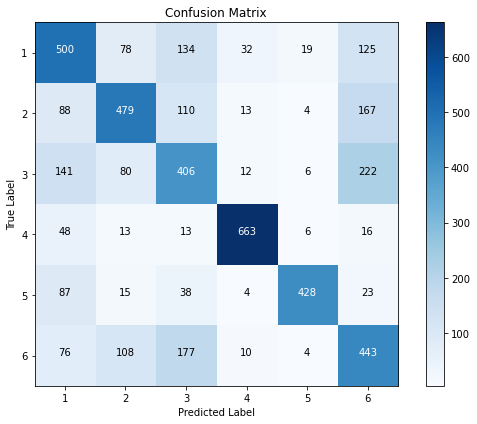

In [70]:
task_type = 'tfidf'
classifier_name = 'logreg'

category_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name)
category_classifier.evaluate_model(valid_data['lemmas'], valid_data['category_map'], task_type=task_type, classifier_name=classifier_name)


### tf-idf + svm

ROC AUC Score: 0.845
Precision: 0.638
Recall: 0.597
Accuracy: 0.587


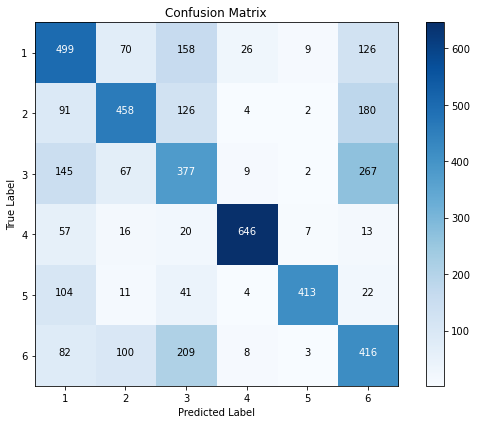

In [63]:
task_type = 'tfidf'
classifier_name = 'svm'

category_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name)
category_classifier.evaluate_model(valid_data['lemmas'], valid_data['category_map'], task_type=task_type, classifier_name=classifier_name)


### FastText + logreg (simple weighted)

ROC AUC Score: 0.854
Precision: 0.620
Recall: 0.604
Accuracy: 0.595


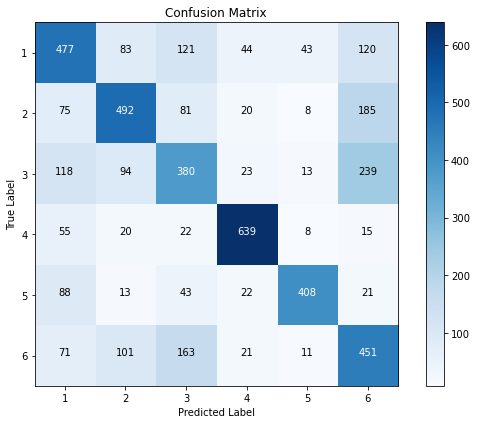

In [69]:
task_type = 'mean_embedding_vectorizer'
classifier_name = 'logreg'

category_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name, embedding_vectorizer = ft_model)
category_classifier.evaluate_model(valid_data['lemmas'], valid_data['category_map'], task_type=task_type, classifier_name=classifier_name)


### FastText + Boosting (simple weighted)

ROC AUC Score: 0.813
Precision: 0.551
Recall: 0.536
Accuracy: 0.522


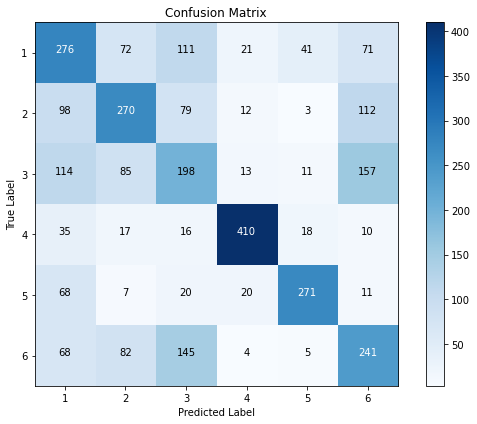

In [297]:
category_boosting = CategoryClassifier(train_data['lemmas'], train_data['category_map'])
category_boosting.fit_classifier(task_type = 'simple_embedding_vectorizer', classifier_name = 'catboost', embedding_vectorizer = ft_model)
X_valid_processed, y_valid = category_boosting.transform_mean_embedding(valid_data['lemmas']), valid_data['category_map']
category_boosting.evaluate_model(X_valid_processed, y_valid)


### FastText + logreg (if-idf weighted)

ROC AUC Score: 0.837
Precision: 0.571
Recall: 0.562
Accuracy: 0.551


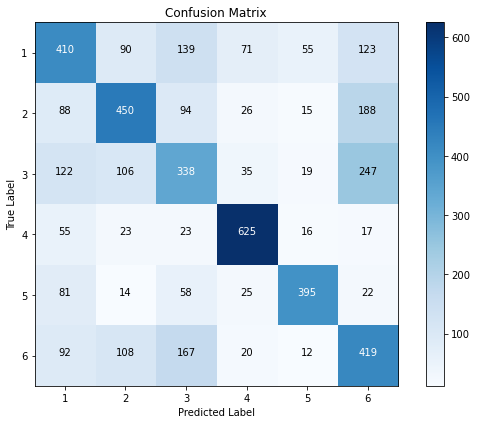

In [71]:
task_type = 'tfidf_embedding_vectorizer'
classifier_name = 'logreg'

category_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name, embedding_vectorizer = ft_model)
category_classifier.evaluate_model(valid_data['lemmas'], valid_data['category_map'], task_type=task_type, classifier_name=classifier_name)


### bag_of_words + logreg

ROC AUC Score: 0.834
Precision: 0.557
Recall: 0.543
Accuracy: 0.527


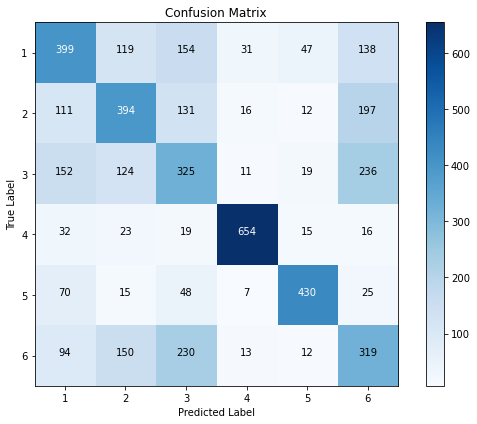

In [75]:
task_type = 'bag_of_words'
classifier_name = 'logreg'

category_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name)
category_classifier.evaluate_model(valid_data['lemmas'], valid_data['category_map'], task_type=task_type, classifier_name=classifier_name)


–í —Ü–µ–ª–æ–º, –∫–∞—á–µ—Å—Ç–≤–æ —Ö–æ—Ä–æ—à–µ–µ. –û—à–∏–±–∫–∏ –ø—Ä–æ–∏—Å—Ö–æ–¥—è—Ç –≤ –º–∞—Å—Å–µ —Å–≤–æ–µ–π –ø—Ä–∏ –ø–æ–ø—ã—Ç–∫–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –æ—Ç–ª–∏—á–∏—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—ã–µ –∫–∞—Ä—Ç—ã –æ—Ç 1) –∫—Ä–µ–¥–∏—Ç–æ–≤ 2) –¥–µ–±–µ—Ç–æ–≤—ã—Ö –∫–∞—Ä—Ç.

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å - __logreg + tf-idf__

## –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å –≤ –∫–∞—á–µ—Å—Ç–≤–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

In [8]:
with open('./–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ–∞–π–ª—ã/sentiment_classifier.pkl', 'rb') as f:
    sentiment_classifier = pickle.load(f)

In [10]:
train_sentiment = train_data['grade'].values
valid_sentiment = sentiment_classifier.predict(valid_data['lemmas'], 'tfidf', 'svm', threshold = 0.58)

### svm + tf-idf

ROC AUC Score: 0.859
Precision: 0.651
Recall: 0.610
Accuracy: 0.600


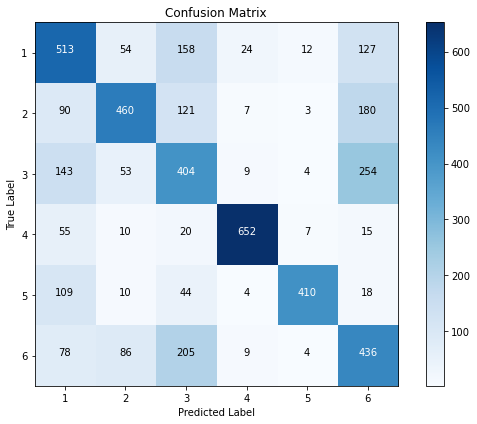

In [93]:
task_type = 'tfidf'
classifier_name = 'svm'

category_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name, sentiment = train_sentiment)
category_classifier.evaluate_model(valid_data['lemmas'], valid_data['category_map'], task_type=task_type, classifier_name=classifier_name, sentiment = valid_sentiment)


### logreg + tf-idf

ROC AUC Score: 0.870
Precision: 0.630
Recall: 0.609
Accuracy: 0.598


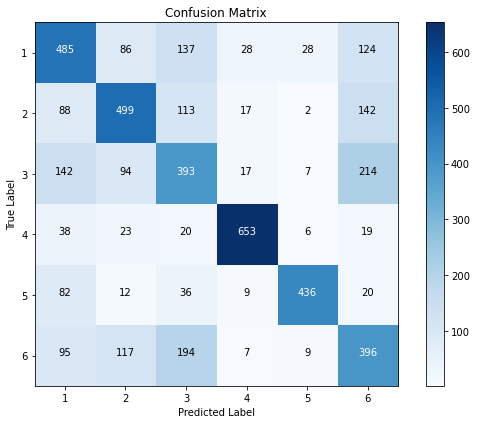

In [11]:
task_type = 'tfidf'
classifier_name = 'logreg'

category_classifier.fit_classifier(task_type=task_type, classifier_name=classifier_name, sentiment = train_sentiment)
category_classifier.evaluate_model(valid_data['lemmas'], valid_data['category_map'], task_type=task_type, classifier_name=classifier_name, sentiment = valid_sentiment)


### –í—ã–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å

In [12]:
with open('product_classifer.pkl', 'wb') as f:
    pickle.dump(category_classifier, f)

# –ü–æ–¥–±–æ—Ä –ø–æ—Ä–æ–≥–∞ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ SentimentClassifier –≤ –ø–æ–∏—Å–∫–∞—Ö –ª—É—á—à–∏—Ö precission, recall, accuracy –∏ f-score

In [98]:
best_model_type = 'tfidf'
best_model_classifier = 'svm'

thresholds = np.arange(0.1, 1.0, 0.02)
best_f1_score = 0
best_threshold = 0
best_precision = 0
best_recall = 0
best_accuracy = 0

predictions_proba_sentiment = sentiment_classifier.predict_proba(valid_data['lemmas'], best_model_type, best_model_classifier)
y_valid = valid_data['grade']
for threshold in thresholds:
    predictions_thresholded = (predictions_proba_sentiment > threshold).astype(int)
    f1 = f1_score(y_valid, predictions_thresholded)
    precision = precision_score(y_valid, predictions_thresholded)
    recall = recall_score(y_valid, predictions_thresholded)
    accuracy = accuracy_score(y_valid, predictions_thresholded)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold
        best_precision = precision
        best_recall = recall
        best_accuracy = accuracy

print(f"Best threshold: {best_threshold:.3f}")
print()
print(f"Best F1-score: {best_f1_score:.3f}")
print(f"Best precision: {best_precision:.3f}")
print(f"Best recall: {best_recall:.3f}")
print(f"Best accuracy: {best_accuracy:.3f}")



Best threshold: 0.580

Best F1-score: 0.972
Best precision: 0.979
Best recall: 0.966
Best accuracy: 0.960
